# Fourier Transform and Moving Average Method for Gravity Regional and Residual Separation (on 2D slice)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!git clone https://www.github.com/yohanesnuwara/computational-geophysics

Cloning into 'computational-geophysics'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 104 (delta 44), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 83.05 KiB | 4.61 MiB/s, done.
Resolving deltas: 100% (44/44), done.


Data

In [ ]:
data = np.loadtxt('/content/computational-geophysics/gravity/data/Gravity_UTM.txt')
utm_x = np.array(data[:,0])
utm_y = np.array(data[:,1])
CBA = np.array(data[:,2])

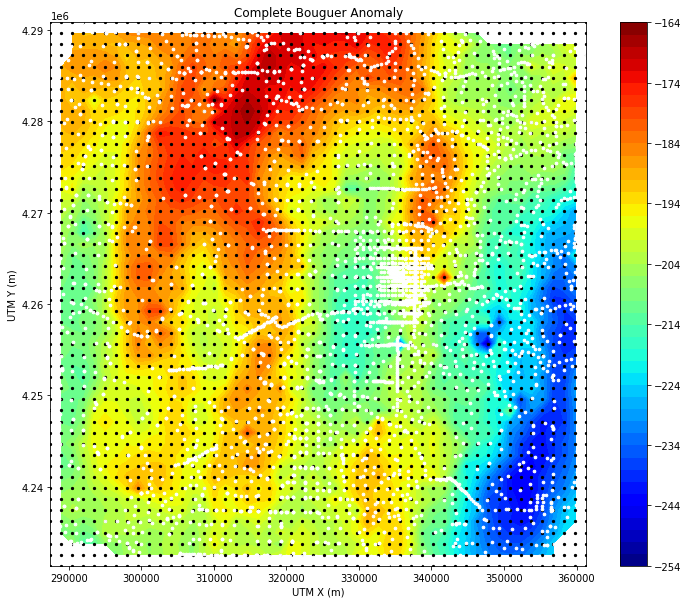

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.scatter(xi, yi, s=5, color='black')

# plot stations WITH STATION NUMBERS, started from 0
n = np.arange(0,len(utm_x), 1)
ax.scatter(utm_x, utm_y, s=7, color='white')

# for i, txt in enumerate(n):
#     ax.annotate(txt, (utm_x[i], utm_y[i]), size=12)

## Southwest-Northeast Slice

<div>
<img src="https://user-images.githubusercontent.com/51282928/77561620-87a2f980-6ef1-11ea-995a-42b929bc8d3d.jpeg" width="400"/>
</div>

In [ ]:
# SW-NE slice
x_slice = np.array(xi[0])
print('Coordinate slice in X direction:', x_slice)

y_slice = []
for k in range(len(x_slice)):
  yslice = yi[k][k]
  y_slice.append(float(yslice))
y_slice = np.array(y_slice)
print('Coordinate slice in Y direction:', y_slice)

g_slice = []
for k in range(len(x_slice)):
  gslice = zi[k][k]
  g_slice.append(float(gslice))
g_slice = np.array(g_slice)
print('CBA on slice:', g_slice)

Visualize the slice

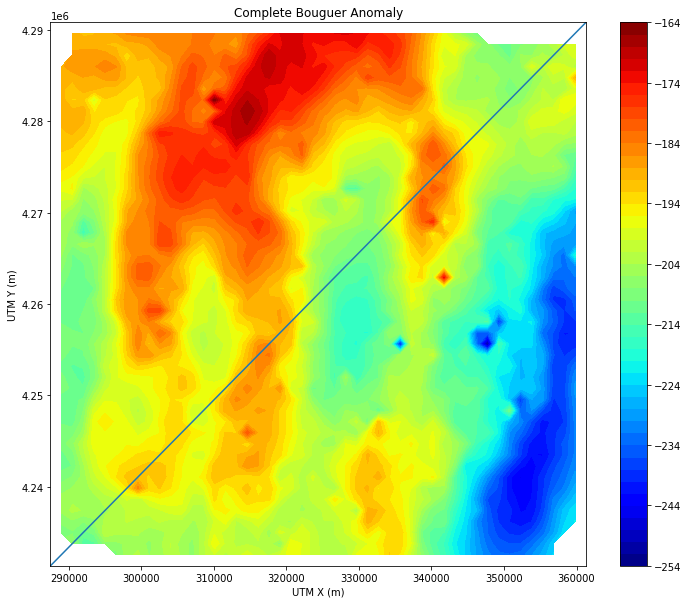

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

### Data preparation for FFT

Create dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

UTM_X         UTM_Y         CBA
0  287457.184700  4.231366e+06         NaN
1  288964.640341  4.232580e+06         NaN
2  290472.095982  4.233793e+06 -205.706931
3  291979.551622  4.235007e+06 -210.851841
4  293487.007263  4.236220e+06 -206.050330
5  294994.462904  4.237434e+06 -204.329496
6  296501.918545  4.238648e+06 -202.552934
7  298009.374186  4.239861e+06 -194.185966
8  299516.829827  4.241075e+06 -190.688002
9  301024.285467  4.242288e+06 -191.265982

Remove NaN from dataframe

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      4
dtype: int64
NaN has successfully been deleted


UTM_X         UTM_Y         CBA
0  290472.095982  4.233793e+06 -205.706931
1  291979.551622  4.235007e+06 -210.851841
2  293487.007263  4.236220e+06 -206.050330
3  294994.462904  4.237434e+06 -204.329496
4  296501.918545  4.238648e+06 -202.552934
5  298009.374186  4.239861e+06 -194.185966
6  299516.829827  4.241075e+06 -190.688002
7  301024.285467  4.242288e+06 -191.265982
8  302531.741108  4.243502e+06 -193.808854
9  304039.196749  4.244715e+06 -192.951010

Calculate interval on slice

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

Put interval into dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

UTM_X         UTM_Y         CBA      Interval
0  290472.095982  4.233793e+06 -205.706931      0.000000
1  291979.551622  4.235007e+06 -210.851841   1935.233113
2  293487.007263  4.236220e+06 -206.050330   3870.466226
3  294994.462904  4.237434e+06 -204.329496   5805.699339
4  296501.918545  4.238648e+06 -202.552934   7740.932452
5  298009.374186  4.239861e+06 -194.185966   9676.165564
6  299516.829827  4.241075e+06 -190.688002  11611.398677
7  301024.285467  4.242288e+06 -191.265982  13546.631790
8  302531.741108  4.243502e+06 -193.808854  15481.864903
9  304039.196749  4.244715e+06 -192.951010  17417.098016

### Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

46


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...   Imaginary     Absolute  LnAbsolute
0  290472.095982  4.233793e+06 -205.706931  ...    0.000000  9120.325193    9.118261
1  291979.551622  4.235007e+06 -210.851841  ...  -49.620512    65.740033    4.185708
2  293487.007263  4.236220e+06 -206.050330  ...   16.671643   170.743042    5.140160
3  294994.462904  4.237434e+06 -204.329496  ... -140.527025   154.570420    5.040650
4  296501.918545  4.238648e+06 -202.552934  ...  102.237874   105.825396    4.661791
5  298009.374186  4.239861e+06 -194.185966  ...   54.678935    54.706483    4.001982
6  299516.829827  4.241075e+06 -190.688002  ...    8.306323     9.160436    2.214894
7  301024.285467  4.242288e+06 -191.265982  ...   15.703535    20.842399    3.036989
8  302531.741108  4.243502e+06 -193.808854  ...   10.921766    10.933350    2.391818
9  304039.196749  4.244715e+06 -192.951010  ...   11.164287    11.313028    2.425955

[10 rows x 9 columns]

Compute sampling frequency

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...     Absolute  LnAbsolute  FreqSample
0  290472.095982  4.233793e+06 -205.706931  ...  9120.325193    9.118261    0.000000
1  291979.551622  4.235007e+06 -210.851841  ...    65.740033    4.185708    0.000011
2  293487.007263  4.236220e+06 -206.050330  ...   170.743042    5.140160    0.000023
3  294994.462904  4.237434e+06 -204.329496  ...   154.570420    5.040650    0.000034
4  296501.918545  4.238648e+06 -202.552934  ...   105.825396    4.661791    0.000046
5  298009.374186  4.239861e+06 -194.185966  ...    54.706483    4.001982    0.000057
6  299516.829827  4.241075e+06 -190.688002  ...     9.160436    2.214894    0.000069
7  301024.285467  4.242288e+06 -191.265982  ...    20.842399    3.036989    0.000080
8  302531.741108  4.243502e+06 -193.808854  ...    10.933350    2.391818    0.000092
9  304039.196749  4.244715e+06 -192.951010  ...    11.313028    2.425955    0.000103

[10 rows x 10 columns]

Wavenumber

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...  LnAbsolute  FreqSample  Wavenumber
0  290472.095982  4.233793e+06 -205.706931  ...    9.118261    0.000000    0.000000
1  291979.551622  4.235007e+06 -210.851841  ...    4.185708    0.000011    0.000072
2  293487.007263  4.236220e+06 -206.050330  ...    5.140160    0.000023    0.000144
3  294994.462904  4.237434e+06 -204.329496  ...    5.040650    0.000034    0.000216
4  296501.918545  4.238648e+06 -202.552934  ...    4.661791    0.000046    0.000289
5  298009.374186  4.239861e+06 -194.185966  ...    4.001982    0.000057    0.000361
6  299516.829827  4.241075e+06 -190.688002  ...    2.214894    0.000069    0.000433
7  301024.285467  4.242288e+06 -191.265982  ...    3.036989    0.000080    0.000505
8  302531.741108  4.243502e+06 -193.808854  ...    2.391818    0.000092    0.000577
9  304039.196749  4.244715e+06 -192.951010  ...    2.425955    0.000103    0.000649

[10 rows x 11 columns]

Plot Spectrum

Text(0, 0.5, 'ln(absolute)')

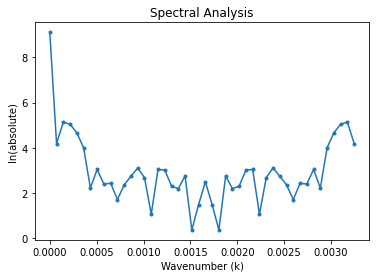

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

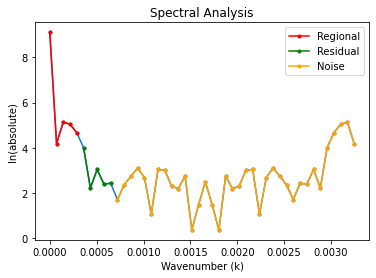

In [ ]:
# guess the cutoff !!!
reg_cut = 5
res_cut = 10

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Determine window for Moving Average

#### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

#### Regression, calculate Cutt-off Frequency, calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  9.758088793639198 

Intercept for Regional Zone:  7.240913512543074
Gradient for Regional Zone:  -11168.455672704733
Intercept for Residual Zone:  4.896918956952932
Gradient for Residual Zone:  -4123.556491682597
Cut-off frequency:  0.00033272222857418576


#### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 9.0


#### Plot regression of spectrum

Text(0, 0.5, 'ln(absolute)')

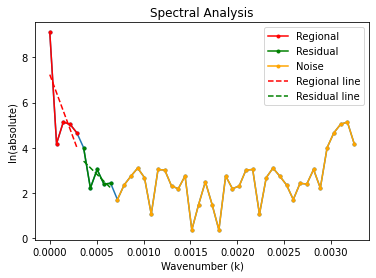

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

### Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

### Print dataframe

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

UTM_X         UTM_Y      Interval         CBA    Regional  Residual
0   290472.095982  4.233793e+06      0.000000 -205.706931         NaN       NaN
1   291979.551622  4.235007e+06   1935.233113 -210.851841         NaN       NaN
2   293487.007263  4.236220e+06   3870.466226 -206.050330         NaN       NaN
3   294994.462904  4.237434e+06   5805.699339 -204.329496         NaN       NaN
4   296501.918545  4.238648e+06   7740.932452 -202.552934         NaN       NaN
5   298009.374186  4.239861e+06   9676.165564 -194.185966         NaN       NaN
6   299516.829827  4.241075e+06  11611.398677 -190.688002         NaN       NaN
7   301024.285467  4.242288e+06  13546.631790 -191.265982         NaN       NaN
8   302531.741108  4.243502e+06  15481.864903 -193.808854 -199.937815  6.128961
9   304039.196749  4.244715e+06  17417.098016 -192.951010 -198.520491  5.569481
10  305546.652390  4.245929e+06  19352.331129 -193.095044 -196.547513  3.452469
11  307054.108031  4.247142e+06  21287.564242 -198.883239 -195.751170 -3.132069
12  308561.563671  4.248356e+06  23222.797355 -199.658009 -195.232115 -4.425894
13  310069.019312  4.249570e+06  25158.030468 -194.847949 -194.376006 -0.471943
14  311576.474953  4.250783e+06  27093.263581 -194.469957 -194.407561 -0.062396
15  313083.930594  4.251997e+06  29028.496693 -190.845919 -194.425107  3.579188
16  314591.386235  4.253210e+06  30963.729806 -189.911263 -194.274583  4.363319
17  316098.841876  4.254424e+06  32898.962919 -184.951951 -193.290482  8.338532
18  317606.297516  4.255637e+06  34834.196032 -185.730830 -192.488240  6.757410
19  319113.753157  4.256851e+06  36769.429145 -189.274817 -192.063770  2.788954

### Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

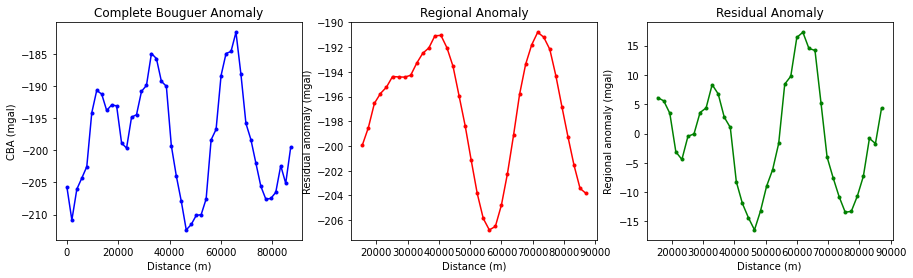

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

### Save data into CSV

In [ ]:
mva.to_csv('/content/fft_SW-NE.csv') 

## Southeast-Nortwest Slice

<div>
<img src="https://user-images.githubusercontent.com/51282928/77572745-19b2fe00-6f02-11ea-8512-1d2ab1b5fdfc.jpeg" width="400"/>
</div>

Clue

In [ ]:
a = [1,2,3,4,5]
for i, j in zip(reversed(range(len(a))), (range(len(a)))):
  print(a[i], a[j])

5 1
4 2
3 3
2 4
1 5


In [ ]:
# SE-NW slice
x_slice = np.array(xi[0])
print('Coordinate slice in X direction:', x_slice)

y_slice = []
for k, j in zip(reversed(range(len(x_slice))), (range(len(x_slice)))):
  yslice = yi[k][j]
  y_slice.append(float(yslice))
y_slice = np.array(y_slice)
print('Coordinate slice in Y direction:', y_slice)

g_slice = []
for k, j in zip(reversed(range(len(x_slice))), (range(len(x_slice)))):
  gslice = zi[k][j]
  g_slice.append(float(gslice))
g_slice = np.array(g_slice)
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [287457.1847     288964.64034082 290472.09598163 291979.55162245
 293487.00726327 294994.46290408 296501.9185449  298009.37418571
 299516.82982653 301024.28546735 302531.74110816 304039.19674898
 305546.6523898  307054.10803061 308561.56367143 310069.01931224
 311576.47495306 313083.93059388 314591.38623469 316098.84187551
 317606.29751633 319113.75315714 320621.20879796 322128.66443878
 323636.12007959 325143.57572041 326651.03136122 328158.48700204
 329665.94264286 331173.39828367 332680.85392449 334188.30956531
 335695.76520612 337203.22084694 338710.67648776 340218.13212857
 341725.58776939 343233.0434102  344740.49905102 346247.95469184
 347755.41033265 349262.86597347 350770.32161429 352277.7772551
 353785.23289592 355292.68853673 356800.14417755 358307.59981837
 359815.05545918 361322.5111    ]
Coordinate slice in Y direction: [4290830.223      4289616.67255102 4288403.12210204 4287189.57165306
 4285976.02120408 4284762.4707551  4283548.92030612 

Visualize the slice

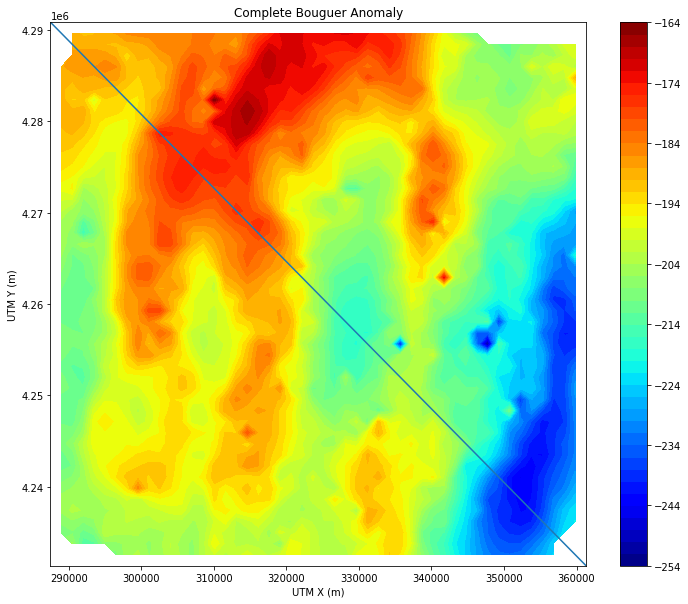

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

### Data preparation for FFT

Create dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

UTM_X         UTM_Y         CBA
0  287457.184700  4.290830e+06         NaN
1  288964.640341  4.289617e+06         NaN
2  290472.095982  4.288403e+06 -188.800447
3  291979.551622  4.287190e+06 -187.100593
4  293487.007263  4.285976e+06 -186.210323
5  294994.462904  4.284762e+06 -187.247706
6  296501.918545  4.283549e+06 -190.929077
7  298009.374186  4.282335e+06 -193.911992
8  299516.829827  4.281122e+06 -193.717310
9  301024.285467  4.279908e+06 -188.310866

Remove NaN from dataframe

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      5
dtype: int64
NaN has successfully been deleted


UTM_X         UTM_Y         CBA
0  290472.095982  4.288403e+06 -188.800447
1  291979.551622  4.287190e+06 -187.100593
2  293487.007263  4.285976e+06 -186.210323
3  294994.462904  4.284762e+06 -187.247706
4  296501.918545  4.283549e+06 -190.929077
5  298009.374186  4.282335e+06 -193.911992
6  299516.829827  4.281122e+06 -193.717310
7  301024.285467  4.279908e+06 -188.310866
8  302531.741108  4.278695e+06 -174.907887
9  304039.196749  4.277481e+06 -177.405821

Calculate interval on slice

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

Put interval into dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

UTM_X         UTM_Y         CBA      Interval
0  290472.095982  4.288403e+06 -188.800447      0.000000
1  291979.551622  4.287190e+06 -187.100593   1935.233113
2  293487.007263  4.285976e+06 -186.210323   3870.466226
3  294994.462904  4.284762e+06 -187.247706   5805.699339
4  296501.918545  4.283549e+06 -190.929077   7740.932452
5  298009.374186  4.282335e+06 -193.911992   9676.165564
6  299516.829827  4.281122e+06 -193.717310  11611.398677
7  301024.285467  4.279908e+06 -188.310866  13546.631790
8  302531.741108  4.278695e+06 -174.907887  15481.864903
9  304039.196749  4.277481e+06 -177.405821  17417.098016

### Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

45


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...   Imaginary     Absolute  LnAbsolute
0  290472.095982  4.288403e+06 -188.800447  ...    0.000000  9046.233496    9.110104
1  291979.551622  4.287190e+06 -187.100593  ... -478.492136   496.282953    6.207146
2  293487.007263  4.285976e+06 -186.210323  ... -117.345005   225.478094    5.418223
3  294994.462904  4.284762e+06 -187.247706  ... -220.843223   245.896089    5.504909
4  296501.918545  4.283549e+06 -190.929077  ...  -48.157236    97.536608    4.580228
5  298009.374186  4.282335e+06 -193.911992  ...  -87.276234   130.715527    4.873023
6  299516.829827  4.281122e+06 -193.717310  ...  -55.217097    77.582938    4.351348
7  301024.285467  4.279908e+06 -188.310866  ...  -31.375705    31.378580    3.446126
8  302531.741108  4.278695e+06 -174.907887  ...  -28.387284    28.458158    3.348435
9  304039.196749  4.277481e+06 -177.405821  ...  -12.286222    14.273282    2.658389

[10 rows x 9 columns]

Compute sampling frequency

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...     Absolute  LnAbsolute  FreqSample
0  290472.095982  4.288403e+06 -188.800447  ...  9046.233496    9.110104    0.000000
1  291979.551622  4.287190e+06 -187.100593  ...   496.282953    6.207146    0.000012
2  293487.007263  4.285976e+06 -186.210323  ...   225.478094    5.418223    0.000023
3  294994.462904  4.284762e+06 -187.247706  ...   245.896089    5.504909    0.000035
4  296501.918545  4.283549e+06 -190.929077  ...    97.536608    4.580228    0.000047
5  298009.374186  4.282335e+06 -193.911992  ...   130.715527    4.873023    0.000059
6  299516.829827  4.281122e+06 -193.717310  ...    77.582938    4.351348    0.000070
7  301024.285467  4.279908e+06 -188.310866  ...    31.378580    3.446126    0.000082
8  302531.741108  4.278695e+06 -174.907887  ...    28.458158    3.348435    0.000094
9  304039.196749  4.277481e+06 -177.405821  ...    14.273282    2.658389    0.000106

[10 rows x 10 columns]

Wavenumber

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...  LnAbsolute  FreqSample  Wavenumber
0  290472.095982  4.288403e+06 -188.800447  ...    9.110104    0.000000    0.000000
1  291979.551622  4.287190e+06 -187.100593  ...    6.207146    0.000012    0.000074
2  293487.007263  4.285976e+06 -186.210323  ...    5.418223    0.000023    0.000148
3  294994.462904  4.284762e+06 -187.247706  ...    5.504909    0.000035    0.000221
4  296501.918545  4.283549e+06 -190.929077  ...    4.580228    0.000047    0.000295
5  298009.374186  4.282335e+06 -193.911992  ...    4.873023    0.000059    0.000369
6  299516.829827  4.281122e+06 -193.717310  ...    4.351348    0.000070    0.000443
7  301024.285467  4.279908e+06 -188.310866  ...    3.446126    0.000082    0.000517
8  302531.741108  4.278695e+06 -174.907887  ...    3.348435    0.000094    0.000590
9  304039.196749  4.277481e+06 -177.405821  ...    2.658389    0.000106    0.000664

[10 rows x 11 columns]

Plot Spectrum

Text(0, 0.5, 'ln(absolute)')

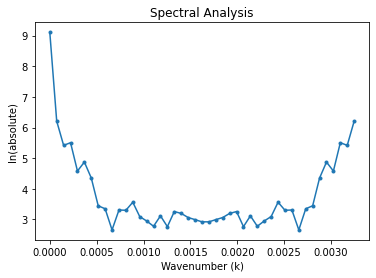

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

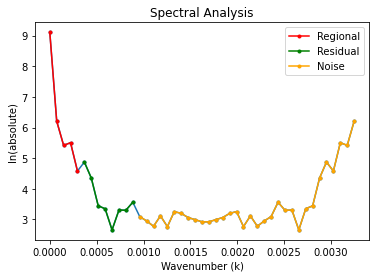

In [ ]:
# guess the cutoff !!!
reg_cut = 5
res_cut = 13

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Determine window for Moving Average

#### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

#### Regression, calculate Cutt-off Frequency, calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  11.848427757919138 

Intercept for Regional Zone:  8.11651979672154
Gradient for Regional Zone:  -13229.529997343852
Intercept for Residual Zone:  5.178301300542369
Gradient for Residual Zone:  -2506.9762633728965
Cut-off frequency:  0.00027402226830259413


#### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 11.0


#### Plot regression of spectrum

Text(0, 0.5, 'ln(absolute)')

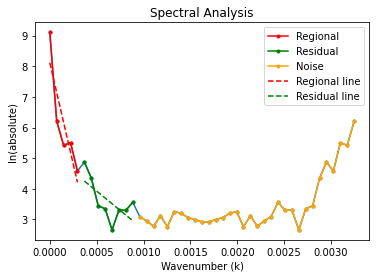

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

### Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

### Print dataframe

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

UTM_X         UTM_Y      Interval         CBA    Regional  Residual
0   290472.095982  4.288403e+06      0.000000 -188.800447         NaN       NaN
1   291979.551622  4.287190e+06   1935.233113 -187.100593         NaN       NaN
2   293487.007263  4.285976e+06   3870.466226 -186.210323         NaN       NaN
3   294994.462904  4.284762e+06   5805.699339 -187.247706         NaN       NaN
4   296501.918545  4.283549e+06   7740.932452 -190.929077         NaN       NaN
5   298009.374186  4.282335e+06   9676.165564 -193.911992         NaN       NaN
6   299516.829827  4.281122e+06  11611.398677 -193.717310         NaN       NaN
7   301024.285467  4.279908e+06  13546.631790 -188.310866         NaN       NaN
8   302531.741108  4.278695e+06  15481.864903 -174.907887         NaN       NaN
9   304039.196749  4.277481e+06  17417.098016 -177.405821         NaN       NaN
10  305546.652390  4.276268e+06  19352.331129 -175.990258 -185.866571  9.876313
11  307054.108031  4.275054e+06  21287.564242 -175.998342 -184.702743  8.704402
12  308561.563671  4.273841e+06  23222.797355 -177.815650 -183.858657  6.043008
13  310069.019312  4.272627e+06  25158.030468 -178.543276 -183.161653  4.618377
14  311576.474953  4.271413e+06  27093.263581 -178.799008 -182.393590  3.594582
15  313083.930594  4.270200e+06  29028.496693 -176.895318 -181.117793  4.222475
16  314591.386235  4.268986e+06  30963.729806 -179.182100 -179.778712  0.596612
17  316098.841876  4.267773e+06  32898.962919 -177.836437 -178.334996  0.498560
18  317606.297516  4.266559e+06  34834.196032 -181.719026 -177.735738 -3.983287
19  319113.753157  4.265346e+06  36769.429145 -186.540336 -178.793234 -7.747102

### Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

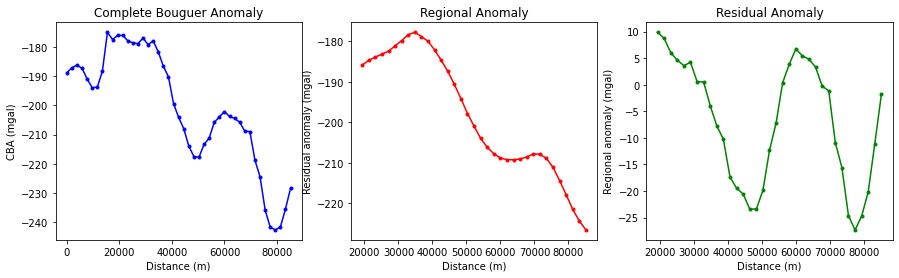

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

### Save data into CSV

In [ ]:
mva.to_csv('/content/fft_SE-NW.csv') 

## East-West Slice 1

<div>
<img src="https://user-images.githubusercontent.com/51282928/77562687-e9179800-6ef2-11ea-8893-01805aa2db39.jpeg" width="400"/>
</div>

In [ ]:
# E-W slice
x_slice = xi[10]
print('Coordinate slice in X direction:', x_slice)

y_slice = yi[10]
print('Coordinate slice in Y direction:', y_slice)

g_slice = zi[10]
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [287457.1847     288964.64034082 290472.09598163 291979.55162245
 293487.00726327 294994.46290408 296501.9185449  298009.37418571
 299516.82982653 301024.28546735 302531.74110816 304039.19674898
 305546.6523898  307054.10803061 308561.56367143 310069.01931224
 311576.47495306 313083.93059388 314591.38623469 316098.84187551
 317606.29751633 319113.75315714 320621.20879796 322128.66443878
 323636.12007959 325143.57572041 326651.03136122 328158.48700204
 329665.94264286 331173.39828367 332680.85392449 334188.30956531
 335695.76520612 337203.22084694 338710.67648776 340218.13212857
 341725.58776939 343233.0434102  344740.49905102 346247.95469184
 347755.41033265 349262.86597347 350770.32161429 352277.7772551
 353785.23289592 355292.68853673 356800.14417755 358307.59981837
 359815.05545918 361322.5111    ]
Coordinate slice in Y direction: [4243501.7554898 4243501.7554898 4243501.7554898 4243501.7554898
 4243501.7554898 4243501.7554898 4243501.7554898 4243501

Visualize the slice

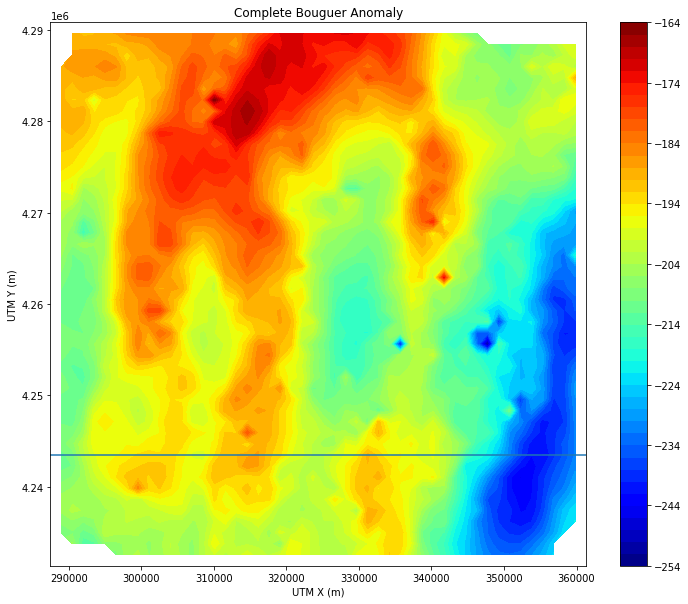

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

### Data preparation for FFT

Create dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

UTM_X         UTM_Y         CBA
0  287457.184700  4.243502e+06         NaN
1  288964.640341  4.243502e+06 -210.684510
2  290472.095982  4.243502e+06 -208.941836
3  291979.551622  4.243502e+06 -202.793251
4  293487.007263  4.243502e+06 -198.273014
5  294994.462904  4.243502e+06 -196.881126
6  296501.918545  4.243502e+06 -196.246887
7  298009.374186  4.243502e+06 -195.270077
8  299516.829827  4.243502e+06 -193.743529
9  301024.285467  4.243502e+06 -193.627887

Remove NaN from dataframe

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      2
dtype: int64
NaN has successfully been deleted


UTM_X         UTM_Y         CBA
0  288964.640341  4.243502e+06 -210.684510
1  290472.095982  4.243502e+06 -208.941836
2  291979.551622  4.243502e+06 -202.793251
3  293487.007263  4.243502e+06 -198.273014
4  294994.462904  4.243502e+06 -196.881126
5  296501.918545  4.243502e+06 -196.246887
6  298009.374186  4.243502e+06 -195.270077
7  299516.829827  4.243502e+06 -193.743529
8  301024.285467  4.243502e+06 -193.627887
9  302531.741108  4.243502e+06 -193.808854

Calculate interval on slice

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

Put interval into dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

UTM_X         UTM_Y         CBA      Interval
0  288964.640341  4.243502e+06 -210.684510      0.000000
1  290472.095982  4.243502e+06 -208.941836   1507.455641
2  291979.551622  4.243502e+06 -202.793251   3014.911282
3  293487.007263  4.243502e+06 -198.273014   4522.366922
4  294994.462904  4.243502e+06 -196.881126   6029.822563
5  296501.918545  4.243502e+06 -196.246887   7537.278204
6  298009.374186  4.243502e+06 -195.270077   9044.733845
7  299516.829827  4.243502e+06 -193.743529  10552.189486
8  301024.285467  4.243502e+06 -193.627887  12059.645127
9  302531.741108  4.243502e+06 -193.808854  13567.100767

### Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

48


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...   Imaginary     Absolute  LnAbsolute
0  288964.640341  4.243502e+06 -210.684510  ...    0.000000  9821.482135    9.192327
1  290472.095982  4.243502e+06 -208.941836  ... -269.773666   410.182920    6.016603
2  291979.551622  4.243502e+06 -202.793251  ... -252.202713   270.409067    5.599936
3  293487.007263  4.243502e+06 -198.273014  ... -141.861200   160.457591    5.078030
4  294994.462904  4.243502e+06 -196.881126  ...  -68.429755    72.093622    4.277966
5  296501.918545  4.243502e+06 -196.246887  ...    4.393970    46.370116    3.836655
6  298009.374186  4.243502e+06 -195.270077  ...  -41.659616    43.032675    3.761960
7  299516.829827  4.243502e+06 -193.743529  ...  -17.484213    25.988981    3.257673
8  301024.285467  4.243502e+06 -193.627887  ...   15.180542    16.937561    2.829534
9  302531.741108  4.243502e+06 -193.808854  ...   -5.821260     6.606820    1.888102

[10 rows x 9 columns]

Compute sampling frequency

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...     Absolute  LnAbsolute  FreqSample
0  288964.640341  4.243502e+06 -210.684510  ...  9821.482135    9.192327    0.000000
1  290472.095982  4.243502e+06 -208.941836  ...   410.182920    6.016603    0.000014
2  291979.551622  4.243502e+06 -202.793251  ...   270.409067    5.599936    0.000028
3  293487.007263  4.243502e+06 -198.273014  ...   160.457591    5.078030    0.000042
4  294994.462904  4.243502e+06 -196.881126  ...    72.093622    4.277966    0.000056
5  296501.918545  4.243502e+06 -196.246887  ...    46.370116    3.836655    0.000071
6  298009.374186  4.243502e+06 -195.270077  ...    43.032675    3.761960    0.000085
7  299516.829827  4.243502e+06 -193.743529  ...    25.988981    3.257673    0.000099
8  301024.285467  4.243502e+06 -193.627887  ...    16.937561    2.829534    0.000113
9  302531.741108  4.243502e+06 -193.808854  ...     6.606820    1.888102    0.000127

[10 rows x 10 columns]

Wavenumber

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...  LnAbsolute  FreqSample  Wavenumber
0  288964.640341  4.243502e+06 -210.684510  ...    9.192327    0.000000    0.000000
1  290472.095982  4.243502e+06 -208.941836  ...    6.016603    0.000014    0.000089
2  291979.551622  4.243502e+06 -202.793251  ...    5.599936    0.000028    0.000177
3  293487.007263  4.243502e+06 -198.273014  ...    5.078030    0.000042    0.000266
4  294994.462904  4.243502e+06 -196.881126  ...    4.277966    0.000056    0.000355
5  296501.918545  4.243502e+06 -196.246887  ...    3.836655    0.000071    0.000443
6  298009.374186  4.243502e+06 -195.270077  ...    3.761960    0.000085    0.000532
7  299516.829827  4.243502e+06 -193.743529  ...    3.257673    0.000099    0.000621
8  301024.285467  4.243502e+06 -193.627887  ...    2.829534    0.000113    0.000709
9  302531.741108  4.243502e+06 -193.808854  ...    1.888102    0.000127    0.000798

[10 rows x 11 columns]

Plot Spectrum

Text(0, 0.5, 'ln(absolute)')

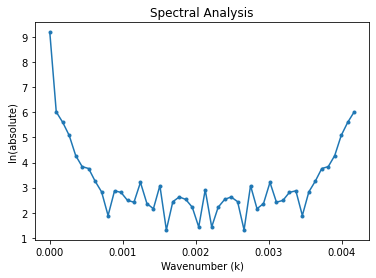

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

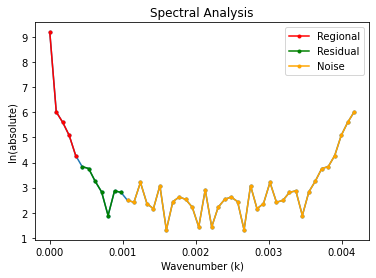

In [ ]:
# guess the cutoff !!!
reg_cut = 5
res_cut = 12

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Determine window for Moving Average

#### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

#### Regression, calculate Cutt-off Frequency, calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  11.912710200920335 

Intercept for Regional Zone:  8.186431735280394
Gradient for Regional Zone:  -12141.412774457052
Intercept for Residual Zone:  4.815578532770949
Gradient for Residual Zone:  -2507.225379002605
Cut-off frequency:  0.00034988453765180693


#### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 11.0


#### Plot regression of spectrum

Text(0, 0.5, 'ln(absolute)')

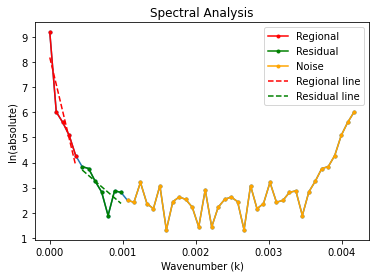

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

### Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

### Print dataframe

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

UTM_X         UTM_Y      Interval         CBA    Regional  Residual
0   288964.640341  4.243502e+06      0.000000 -210.684510         NaN       NaN
1   290472.095982  4.243502e+06   1507.455641 -208.941836         NaN       NaN
2   291979.551622  4.243502e+06   3014.911282 -202.793251         NaN       NaN
3   293487.007263  4.243502e+06   4522.366922 -198.273014         NaN       NaN
4   294994.462904  4.243502e+06   6029.822563 -196.881126         NaN       NaN
5   296501.918545  4.243502e+06   7537.278204 -196.246887         NaN       NaN
6   298009.374186  4.243502e+06   9044.733845 -195.270077         NaN       NaN
7   299516.829827  4.243502e+06  10552.189486 -193.743529         NaN       NaN
8   301024.285467  4.243502e+06  12059.645127 -193.627887         NaN       NaN
9   302531.741108  4.243502e+06  13567.100767 -193.808854         NaN       NaN
10  304039.196749  4.243502e+06  15074.556408 -193.449914 -198.520080  5.070166
11  305546.652390  4.243502e+06  16582.012049 -194.722462 -197.068985  2.346523
12  307054.108031  4.243502e+06  18089.467690 -198.471854 -196.117169 -2.354686
13  308561.563671  4.243502e+06  19596.923331 -199.354185 -195.804526 -3.549658
14  310069.019312  4.243502e+06  21104.378971 -194.082660 -195.423585  1.340925
15  311576.474953  4.243502e+06  22611.834612 -190.300803 -194.825374  4.524571
16  313083.930594  4.243502e+06  24119.290253 -190.238562 -194.279162  4.040601
17  314591.386235  4.243502e+06  25626.745894 -188.600643 -193.672850  5.072207
18  316098.841876  4.243502e+06  27134.201535 -187.699009 -193.123348  5.424340
19  317606.297516  4.243502e+06  28641.657176 -191.637161 -192.942373  1.305213

### Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

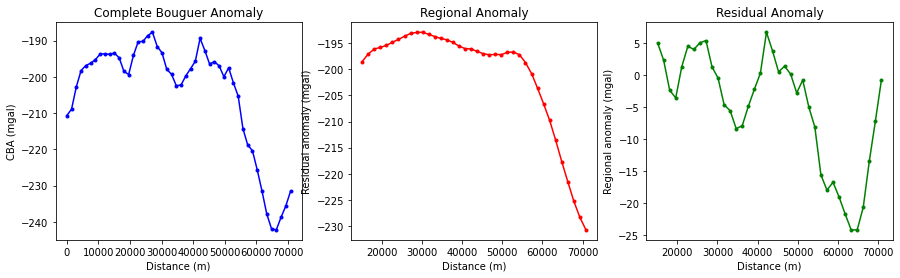

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

### Save data into CSV

In [ ]:
mva.to_csv('/content/fft_E-W_1.csv') 

## East-West Slice 2

In [ ]:
# E-W slice
x_slice = xi[25]
print('Coordinate slice in X direction:', x_slice)

y_slice = yi[25]
print('Coordinate slice in Y direction:', y_slice)

g_slice = zi[25]
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [287457.1847     288964.64034082 290472.09598163 291979.55162245
 293487.00726327 294994.46290408 296501.9185449  298009.37418571
 299516.82982653 301024.28546735 302531.74110816 304039.19674898
 305546.6523898  307054.10803061 308561.56367143 310069.01931224
 311576.47495306 313083.93059388 314591.38623469 316098.84187551
 317606.29751633 319113.75315714 320621.20879796 322128.66443878
 323636.12007959 325143.57572041 326651.03136122 328158.48700204
 329665.94264286 331173.39828367 332680.85392449 334188.30956531
 335695.76520612 337203.22084694 338710.67648776 340218.13212857
 341725.58776939 343233.0434102  344740.49905102 346247.95469184
 347755.41033265 349262.86597347 350770.32161429 352277.7772551
 353785.23289592 355292.68853673 356800.14417755 358307.59981837
 359815.05545918 361322.5111    ]
Coordinate slice in Y direction: [4261705.01222449 4261705.01222449 4261705.01222449 4261705.01222449
 4261705.01222449 4261705.01222449 4261705.01222449 

Visualize the slice

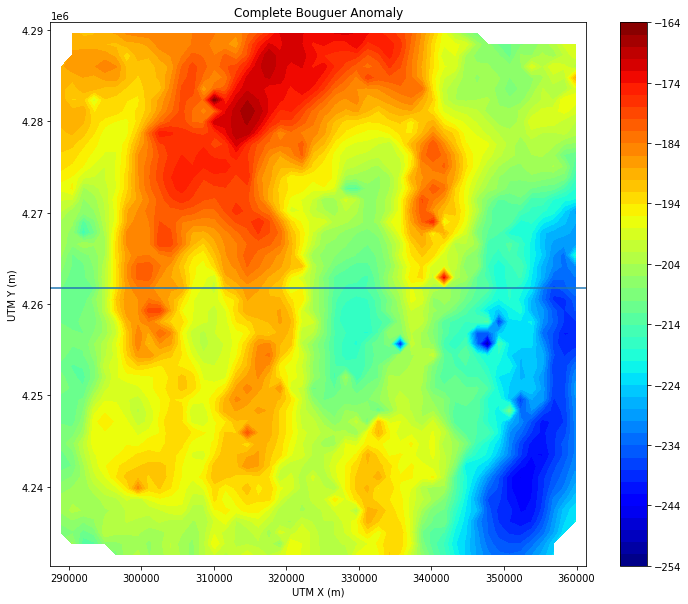

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

### Data preparation for FFT

Create dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

UTM_X         UTM_Y         CBA
0  287457.184700  4.261705e+06         NaN
1  288964.640341  4.261705e+06 -209.973401
2  290472.095982  4.261705e+06 -211.127576
3  291979.551622  4.261705e+06 -211.359211
4  293487.007263  4.261705e+06 -210.023278
5  294994.462904  4.261705e+06 -202.325972
6  296501.918545  4.261705e+06 -194.140795
7  298009.374186  4.261705e+06 -187.117729
8  299516.829827  4.261705e+06 -184.471535
9  301024.285467  4.261705e+06 -184.619255

Remove NaN from dataframe

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      2
dtype: int64
NaN has successfully been deleted


UTM_X         UTM_Y         CBA
0  288964.640341  4.261705e+06 -209.973401
1  290472.095982  4.261705e+06 -211.127576
2  291979.551622  4.261705e+06 -211.359211
3  293487.007263  4.261705e+06 -210.023278
4  294994.462904  4.261705e+06 -202.325972
5  296501.918545  4.261705e+06 -194.140795
6  298009.374186  4.261705e+06 -187.117729
7  299516.829827  4.261705e+06 -184.471535
8  301024.285467  4.261705e+06 -184.619255
9  302531.741108  4.261705e+06 -188.369917

Calculate interval on slice

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

Put interval into dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

UTM_X         UTM_Y         CBA      Interval
0  288964.640341  4.261705e+06 -209.973401      0.000000
1  290472.095982  4.261705e+06 -211.127576   1507.455641
2  291979.551622  4.261705e+06 -211.359211   3014.911282
3  293487.007263  4.261705e+06 -210.023278   4522.366922
4  294994.462904  4.261705e+06 -202.325972   6029.822563
5  296501.918545  4.261705e+06 -194.140795   7537.278204
6  298009.374186  4.261705e+06 -187.117729   9044.733845
7  299516.829827  4.261705e+06 -184.471535  10552.189486
8  301024.285467  4.261705e+06 -184.619255  12059.645127
9  302531.741108  4.261705e+06 -188.369917  13567.100767

### Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

48


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...   Imaginary     Absolute  LnAbsolute
0  288964.640341  4.261705e+06 -209.973401  ...    0.000000  9836.710349    9.193877
1  290472.095982  4.261705e+06 -211.127576  ... -292.441830   332.471407    5.806554
2  291979.551622  4.261705e+06 -211.359211  ... -106.362532   222.596415    5.405360
3  293487.007263  4.261705e+06 -210.023278  ... -167.054777   168.100776    5.124564
4  294994.462904  4.261705e+06 -202.325972  ...   43.367339    89.904946    4.498753
5  296501.918545  4.261705e+06 -194.140795  ...  -21.215768    30.003656    3.401319
6  298009.374186  4.261705e+06 -187.117729  ...  -35.216474    66.864296    4.202665
7  299516.829827  4.261705e+06 -184.471535  ...  -24.078322    28.900919    3.363873
8  301024.285467  4.261705e+06 -184.619255  ...   -8.904990    42.704135    3.754296
9  302531.741108  4.261705e+06 -188.369917  ...  -21.268350    58.713557    4.072671

[10 rows x 9 columns]

Compute sampling frequency

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...     Absolute  LnAbsolute  FreqSample
0  288964.640341  4.261705e+06 -209.973401  ...  9836.710349    9.193877    0.000000
1  290472.095982  4.261705e+06 -211.127576  ...   332.471407    5.806554    0.000014
2  291979.551622  4.261705e+06 -211.359211  ...   222.596415    5.405360    0.000028
3  293487.007263  4.261705e+06 -210.023278  ...   168.100776    5.124564    0.000042
4  294994.462904  4.261705e+06 -202.325972  ...    89.904946    4.498753    0.000056
5  296501.918545  4.261705e+06 -194.140795  ...    30.003656    3.401319    0.000071
6  298009.374186  4.261705e+06 -187.117729  ...    66.864296    4.202665    0.000085
7  299516.829827  4.261705e+06 -184.471535  ...    28.900919    3.363873    0.000099
8  301024.285467  4.261705e+06 -184.619255  ...    42.704135    3.754296    0.000113
9  302531.741108  4.261705e+06 -188.369917  ...    58.713557    4.072671    0.000127

[10 rows x 10 columns]

Wavenumber

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...  LnAbsolute  FreqSample  Wavenumber
0  288964.640341  4.261705e+06 -209.973401  ...    9.193877    0.000000    0.000000
1  290472.095982  4.261705e+06 -211.127576  ...    5.806554    0.000014    0.000089
2  291979.551622  4.261705e+06 -211.359211  ...    5.405360    0.000028    0.000177
3  293487.007263  4.261705e+06 -210.023278  ...    5.124564    0.000042    0.000266
4  294994.462904  4.261705e+06 -202.325972  ...    4.498753    0.000056    0.000355
5  296501.918545  4.261705e+06 -194.140795  ...    3.401319    0.000071    0.000443
6  298009.374186  4.261705e+06 -187.117729  ...    4.202665    0.000085    0.000532
7  299516.829827  4.261705e+06 -184.471535  ...    3.363873    0.000099    0.000621
8  301024.285467  4.261705e+06 -184.619255  ...    3.754296    0.000113    0.000709
9  302531.741108  4.261705e+06 -188.369917  ...    4.072671    0.000127    0.000798

[10 rows x 11 columns]

Plot Spectrum

Text(0, 0.5, 'ln(absolute)')

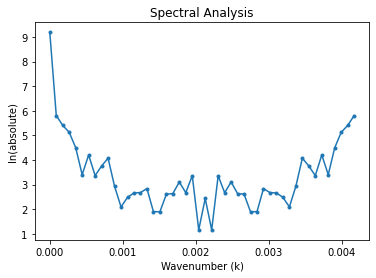

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

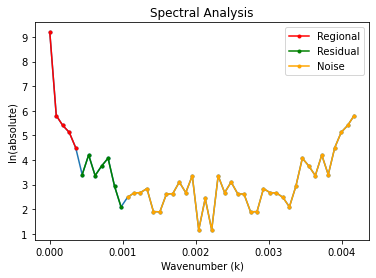

In [ ]:
# guess the cutoff !!!
reg_cut = 5
res_cut = 12

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Determine window for Moving Average

#### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

#### Regression, calculate Cutt-off Frequency, calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  12.678199164131223 

Intercept for Regional Zone:  8.020268991675945
Gradient for Regional Zone:  -11357.650216982422
Intercept for Residual Zone:  5.049628318635339
Gradient for Residual Zone:  -2321.7304557893963
Cut-off frequency:  0.00032875908059727926


#### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 13.0


#### Plot regression of spectrum

Text(0, 0.5, 'ln(absolute)')

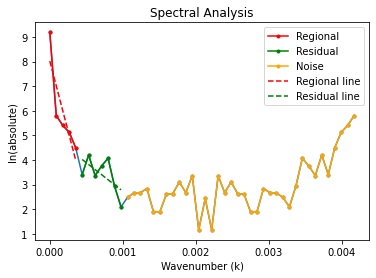

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

### Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

### Print dataframe

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

UTM_X         UTM_Y      Interval         CBA    Regional  Residual
0   288964.640341  4.261705e+06      0.000000 -209.973401         NaN       NaN
1   290472.095982  4.261705e+06   1507.455641 -211.127576         NaN       NaN
2   291979.551622  4.261705e+06   3014.911282 -211.359211         NaN       NaN
3   293487.007263  4.261705e+06   4522.366922 -210.023278         NaN       NaN
4   294994.462904  4.261705e+06   6029.822563 -202.325972         NaN       NaN
5   296501.918545  4.261705e+06   7537.278204 -194.140795         NaN       NaN
6   298009.374186  4.261705e+06   9044.733845 -187.117729         NaN       NaN
7   299516.829827  4.261705e+06  10552.189486 -184.471535         NaN       NaN
8   301024.285467  4.261705e+06  12059.645127 -184.619255         NaN       NaN
9   302531.741108  4.261705e+06  13567.100767 -188.369917         NaN       NaN
10  304039.196749  4.261705e+06  15074.556408 -187.750726         NaN       NaN
11  305546.652390  4.261705e+06  16582.012049 -188.105106         NaN       NaN
12  307054.108031  4.261705e+06  18089.467690 -196.980232 -196.643441 -0.336791
13  308561.563671  4.261705e+06  19596.923331 -198.299335 -195.745436 -2.553899
14  310069.019312  4.261705e+06  21104.378971 -200.915713 -194.959908 -5.955805
15  311576.474953  4.261705e+06  22611.834612 -191.767160 -193.452827  1.685667
16  313083.930594  4.261705e+06  24119.290253 -189.456262 -191.870749  2.414487
17  314591.386235  4.261705e+06  25626.745894 -187.149088 -190.703297  3.554209
18  316098.841876  4.261705e+06  27134.201535 -187.728083 -190.210011  2.481928
19  317606.297516  4.261705e+06  28641.657176 -190.089493 -190.438608  0.349115

### Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

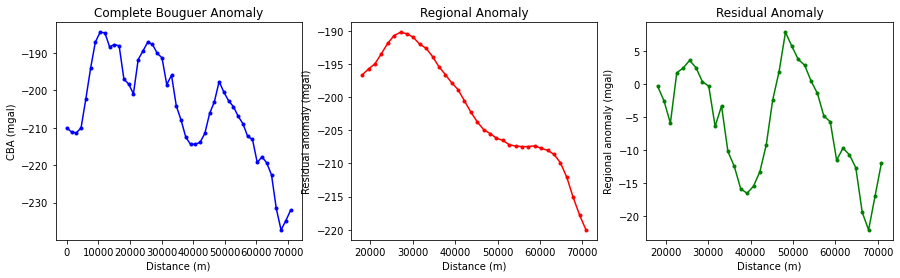

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

### Save data into CSV

In [ ]:
mva.to_csv('/content/fft_E-W_2.csv') 

## East-West Slice 3

In [ ]:
# E-W slice
x_slice = xi[40]
print('Coordinate slice in X direction:', x_slice)

y_slice = yi[40]
print('Coordinate slice in Y direction:', y_slice)

g_slice = zi[40]
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [287457.1847     288964.64034082 290472.09598163 291979.55162245
 293487.00726327 294994.46290408 296501.9185449  298009.37418571
 299516.82982653 301024.28546735 302531.74110816 304039.19674898
 305546.6523898  307054.10803061 308561.56367143 310069.01931224
 311576.47495306 313083.93059388 314591.38623469 316098.84187551
 317606.29751633 319113.75315714 320621.20879796 322128.66443878
 323636.12007959 325143.57572041 326651.03136122 328158.48700204
 329665.94264286 331173.39828367 332680.85392449 334188.30956531
 335695.76520612 337203.22084694 338710.67648776 340218.13212857
 341725.58776939 343233.0434102  344740.49905102 346247.95469184
 347755.41033265 349262.86597347 350770.32161429 352277.7772551
 353785.23289592 355292.68853673 356800.14417755 358307.59981837
 359815.05545918 361322.5111    ]
Coordinate slice in Y direction: [4279908.26895918 4279908.26895918 4279908.26895918 4279908.26895918
 4279908.26895918 4279908.26895918 4279908.26895918 

Visualize the slice

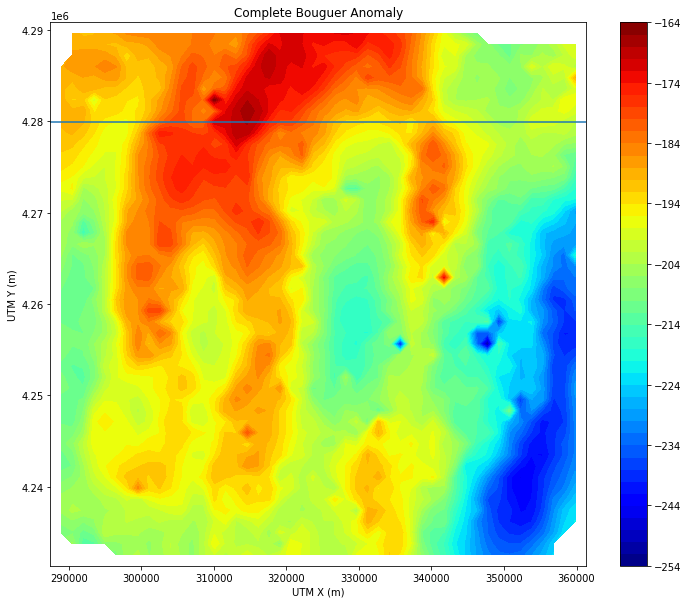

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

### Data preparation for FFT

Create dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

UTM_X         UTM_Y         CBA
0  287457.184700  4.279908e+06         NaN
1  288964.640341  4.279908e+06 -189.638478
2  290472.095982  4.279908e+06 -188.956623
3  291979.551622  4.279908e+06 -189.830115
4  293487.007263  4.279908e+06 -192.904334
5  294994.462904  4.279908e+06 -195.157881
6  296501.918545  4.279908e+06 -196.249216
7  298009.374186  4.279908e+06 -196.592312
8  299516.829827  4.279908e+06 -193.503219
9  301024.285467  4.279908e+06 -188.310866

Remove NaN from dataframe

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      2
dtype: int64
NaN has successfully been deleted


UTM_X         UTM_Y         CBA
0  288964.640341  4.279908e+06 -189.638478
1  290472.095982  4.279908e+06 -188.956623
2  291979.551622  4.279908e+06 -189.830115
3  293487.007263  4.279908e+06 -192.904334
4  294994.462904  4.279908e+06 -195.157881
5  296501.918545  4.279908e+06 -196.249216
6  298009.374186  4.279908e+06 -196.592312
7  299516.829827  4.279908e+06 -193.503219
8  301024.285467  4.279908e+06 -188.310866
9  302531.741108  4.279908e+06 -182.934747

Calculate interval on slice

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

Put interval into dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

UTM_X         UTM_Y         CBA      Interval
0  288964.640341  4.279908e+06 -189.638478      0.000000
1  290472.095982  4.279908e+06 -188.956623   1507.455641
2  291979.551622  4.279908e+06 -189.830115   3014.911282
3  293487.007263  4.279908e+06 -192.904334   4522.366922
4  294994.462904  4.279908e+06 -195.157881   6029.822563
5  296501.918545  4.279908e+06 -196.249216   7537.278204
6  298009.374186  4.279908e+06 -196.592312   9044.733845
7  299516.829827  4.279908e+06 -193.503219  10552.189486
8  301024.285467  4.279908e+06 -188.310866  12059.645127
9  302531.741108  4.279908e+06 -182.934747  13567.100767

### Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

48


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...   Imaginary     Absolute  LnAbsolute
0  288964.640341  4.279908e+06 -189.638478  ...    0.000000  9100.689422    9.116105
1  290472.095982  4.279908e+06 -188.956623  ... -244.739961   298.505028    5.698787
2  291979.551622  4.279908e+06 -189.830115  ...   64.607254    79.612081    4.377166
3  293487.007263  4.279908e+06 -192.904334  ...  -28.605932   102.069094    4.625650
4  294994.462904  4.279908e+06 -195.157881  ...   14.258953    23.464983    3.155509
5  296501.918545  4.279908e+06 -196.249216  ...   -2.768344     7.904181    2.067392
6  298009.374186  4.279908e+06 -196.592312  ...  -39.951435    44.969414    3.805983
7  299516.829827  4.279908e+06 -193.503219  ...  -48.129146    52.123107    3.953608
8  301024.285467  4.279908e+06 -188.310866  ...   -2.559395    15.499788    2.740826
9  302531.741108  4.279908e+06 -182.934747  ...  -17.300182    20.137691    3.002593

[10 rows x 9 columns]

Compute sampling frequency

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...     Absolute  LnAbsolute  FreqSample
0  288964.640341  4.279908e+06 -189.638478  ...  9100.689422    9.116105    0.000000
1  290472.095982  4.279908e+06 -188.956623  ...   298.505028    5.698787    0.000014
2  291979.551622  4.279908e+06 -189.830115  ...    79.612081    4.377166    0.000028
3  293487.007263  4.279908e+06 -192.904334  ...   102.069094    4.625650    0.000042
4  294994.462904  4.279908e+06 -195.157881  ...    23.464983    3.155509    0.000056
5  296501.918545  4.279908e+06 -196.249216  ...     7.904181    2.067392    0.000071
6  298009.374186  4.279908e+06 -196.592312  ...    44.969414    3.805983    0.000085
7  299516.829827  4.279908e+06 -193.503219  ...    52.123107    3.953608    0.000099
8  301024.285467  4.279908e+06 -188.310866  ...    15.499788    2.740826    0.000113
9  302531.741108  4.279908e+06 -182.934747  ...    20.137691    3.002593    0.000127

[10 rows x 10 columns]

Wavenumber

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...  LnAbsolute  FreqSample  Wavenumber
0  288964.640341  4.279908e+06 -189.638478  ...    9.116105    0.000000    0.000000
1  290472.095982  4.279908e+06 -188.956623  ...    5.698787    0.000014    0.000089
2  291979.551622  4.279908e+06 -189.830115  ...    4.377166    0.000028    0.000177
3  293487.007263  4.279908e+06 -192.904334  ...    4.625650    0.000042    0.000266
4  294994.462904  4.279908e+06 -195.157881  ...    3.155509    0.000056    0.000355
5  296501.918545  4.279908e+06 -196.249216  ...    2.067392    0.000071    0.000443
6  298009.374186  4.279908e+06 -196.592312  ...    3.805983    0.000085    0.000532
7  299516.829827  4.279908e+06 -193.503219  ...    3.953608    0.000099    0.000621
8  301024.285467  4.279908e+06 -188.310866  ...    2.740826    0.000113    0.000709
9  302531.741108  4.279908e+06 -182.934747  ...    3.002593    0.000127    0.000798

[10 rows x 11 columns]

Plot Spectrum

Text(0, 0.5, 'ln(absolute)')

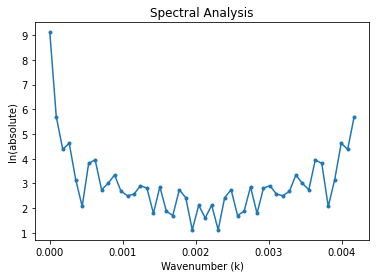

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

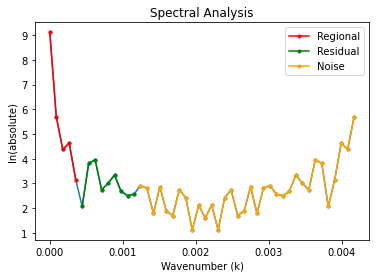

In [ ]:
# guess the cutoff !!!
reg_cut = 5
res_cut = 14

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Determine window for Moving Average

#### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

#### Regression, calculate Cutt-off Frequency, calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  13.040299612959743 

Intercept for Regional Zone:  7.993509306273456
Gradient for Regional Zone:  -14652.657477104003
Intercept for Residual Zone:  3.542663412764833
Gradient for Residual Zone:  -727.6704199143179
Cut-off frequency:  0.0003196301637645389


#### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 13.0


#### Plot regression of spectrum

Text(0, 0.5, 'ln(absolute)')

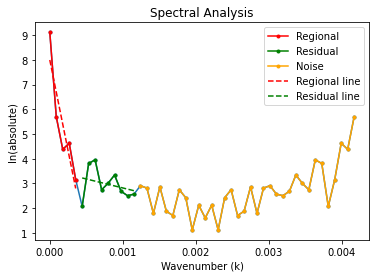

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

### Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

### Print dataframe

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

UTM_X         UTM_Y  ...    Regional   Residual
0   288964.640341  4.279908e+06  ...         NaN        NaN
1   290472.095982  4.279908e+06  ...         NaN        NaN
2   291979.551622  4.279908e+06  ...         NaN        NaN
3   293487.007263  4.279908e+06  ...         NaN        NaN
4   294994.462904  4.279908e+06  ...         NaN        NaN
5   296501.918545  4.279908e+06  ...         NaN        NaN
6   298009.374186  4.279908e+06  ...         NaN        NaN
7   299516.829827  4.279908e+06  ...         NaN        NaN
8   301024.285467  4.279908e+06  ...         NaN        NaN
9   302531.741108  4.279908e+06  ...         NaN        NaN
10  304039.196749  4.279908e+06  ...         NaN        NaN
11  305546.652390  4.279908e+06  ...         NaN        NaN
12  307054.108031  4.279908e+06  ... -188.848788   6.531294
13  308561.563671  4.279908e+06  ... -188.290181   5.913593
14  310069.019312  4.279908e+06  ... -186.892955  16.100278
15  311576.474953  4.279908e+06  ... -185.465914  14.187325
16  313083.930594  4.279908e+06  ... -183.622579  14.681607
17  314591.386235  4.279908e+06  ... -181.513078  13.778706
18  316098.841876  4.279908e+06  ... -179.514220   9.250154
19  317606.297516  4.279908e+06  ... -177.903272   2.253290

[20 rows x 6 columns]

### Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

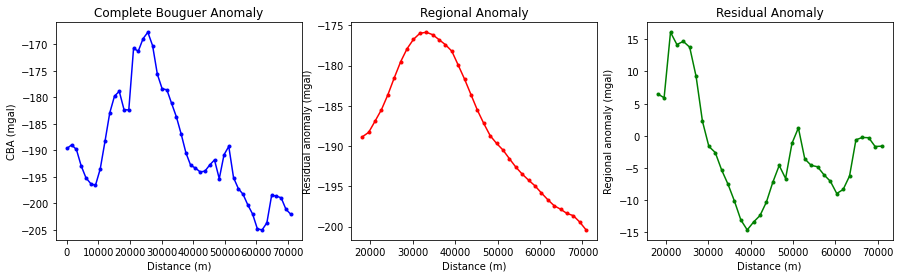

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

### Save data into CSV

In [ ]:
mva.to_csv('/content/fft_E-W_3.csv') 

## North-South Slice 1

<div>
<img src="https://user-images.githubusercontent.com/51282928/77561902-ec5e5400-6ef1-11ea-988f-11800cdadc68.jpeg" width="350"/>
</div>

In [ ]:
# N-S slice

loc = 10

x_slice = []
for k in range(len(xi)):
  xslice = xi[k][loc]
  x_slice.append(float(xslice))
x_slice = np.array(x_slice)
print('Coordinate slice in X direction:', x_slice, '\n')

y_slice = []
for k in range(len(xi)):
  yslice = yi[k][k]
  y_slice.append(float(yslice))
y_slice = np.array(y_slice)
print('Coordinate slice in Y direction:', y_slice, '\n')

g_slice = []
for k in range(len(xi)):
  gslice = zi[k][loc]
  g_slice.append(float(gslice))
g_slice = np.array(g_slice)
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [302531.74110816 302531.74110816 302531.74110816 302531.74110816
 302531.74110816 302531.74110816 302531.74110816 302531.74110816
 302531.74110816 302531.74110816 302531.74110816 302531.74110816
 302531.74110816 302531.74110816 302531.74110816 302531.74110816
 302531.74110816 302531.74110816 302531.74110816 302531.74110816
 302531.74110816 302531.74110816 302531.74110816 302531.74110816
 302531.74110816 302531.74110816 302531.74110816 302531.74110816
 302531.74110816 302531.74110816 302531.74110816 302531.74110816
 302531.74110816 302531.74110816 302531.74110816 302531.74110816
 302531.74110816 302531.74110816 302531.74110816 302531.74110816
 302531.74110816 302531.74110816 302531.74110816 302531.74110816
 302531.74110816 302531.74110816 302531.74110816 302531.74110816
 302531.74110816 302531.74110816] 

Coordinate slice in Y direction: [4231366.251      4232579.80144898 4233793.35189796 4235006.90234694
 4236220.45279592 4237434.0032449  4238647.553693

Visualize the slice

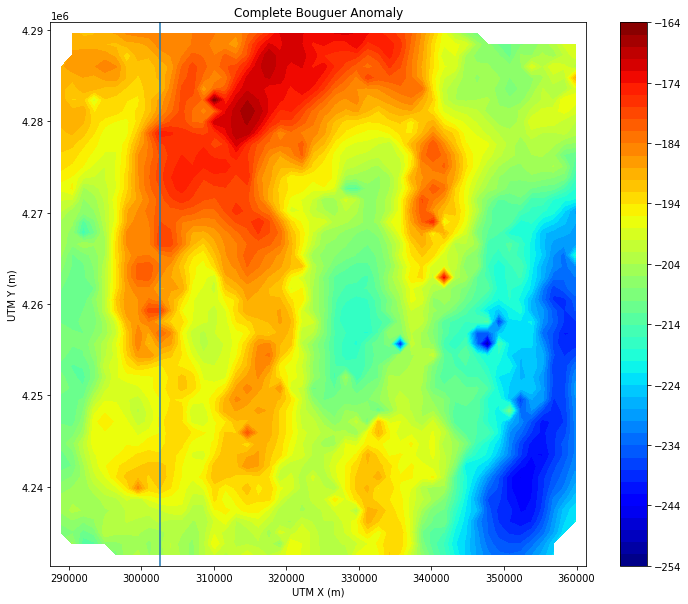

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

### Data preparation for FFT

Create dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

UTM_X         UTM_Y         CBA
0  302531.741108  4.231366e+06         NaN
1  302531.741108  4.232580e+06 -205.232592
2  302531.741108  4.233793e+06 -204.659708
3  302531.741108  4.235007e+06 -204.668045
4  302531.741108  4.236220e+06 -201.718622
5  302531.741108  4.237434e+06 -200.246995
6  302531.741108  4.238648e+06 -196.424674
7  302531.741108  4.239861e+06 -191.891713
8  302531.741108  4.241075e+06 -190.022098
9  302531.741108  4.242288e+06 -191.161895

Remove NaN from dataframe

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      2
dtype: int64
NaN has successfully been deleted


UTM_X         UTM_Y         CBA
0  302531.741108  4.232580e+06 -205.232592
1  302531.741108  4.233793e+06 -204.659708
2  302531.741108  4.235007e+06 -204.668045
3  302531.741108  4.236220e+06 -201.718622
4  302531.741108  4.237434e+06 -200.246995
5  302531.741108  4.238648e+06 -196.424674
6  302531.741108  4.239861e+06 -191.891713
7  302531.741108  4.241075e+06 -190.022098
8  302531.741108  4.242288e+06 -191.161895
9  302531.741108  4.243502e+06 -193.808854

Calculate interval on slice

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

Put interval into dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

UTM_X         UTM_Y         CBA      Interval
0  302531.741108  4.232580e+06 -205.232592      0.000000
1  302531.741108  4.233793e+06 -204.659708   1213.550449
2  302531.741108  4.235007e+06 -204.668045   2427.100898
3  302531.741108  4.236220e+06 -201.718622   3640.651347
4  302531.741108  4.237434e+06 -200.246995   4854.201796
5  302531.741108  4.238648e+06 -196.424674   6067.752245
6  302531.741108  4.239861e+06 -191.891713   7281.302694
7  302531.741108  4.241075e+06 -190.022098   8494.853143
8  302531.741108  4.242288e+06 -191.161895   9708.403592
9  302531.741108  4.243502e+06 -193.808854  10921.954041

### Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

48


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...   Imaginary     Absolute  LnAbsolute
0  302531.741108  4.232580e+06 -205.232592  ...    0.000000  9053.586064    9.110916
1  302531.741108  4.233793e+06 -204.659708  ...  174.965569   216.592330    5.378017
2  302531.741108  4.235007e+06 -204.668045  ...    1.517841    41.366250    3.722465
3  302531.741108  4.236220e+06 -201.718622  ...   -7.725802    41.600906    3.728122
4  302531.741108  4.237434e+06 -200.246995  ...   62.100941    64.802953    4.171351
5  302531.741108  4.238648e+06 -196.424674  ...   51.257742    57.186269    4.046314
6  302531.741108  4.239861e+06 -191.891713  ...   63.758052    67.949005    4.218757
7  302531.741108  4.241075e+06 -190.022098  ...   22.180121    22.626831    3.119136
8  302531.741108  4.242288e+06 -191.161895  ...   12.135868    19.485356    2.969663
9  302531.741108  4.243502e+06 -193.808854  ...    2.015331    11.200121    2.415925

[10 rows x 9 columns]

Compute sampling frequency

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...     Absolute  LnAbsolute  FreqSample
0  302531.741108  4.232580e+06 -205.232592  ...  9053.586064    9.110916    0.000000
1  302531.741108  4.233793e+06 -204.659708  ...   216.592330    5.378017    0.000018
2  302531.741108  4.235007e+06 -204.668045  ...    41.366250    3.722465    0.000035
3  302531.741108  4.236220e+06 -201.718622  ...    41.600906    3.728122    0.000053
4  302531.741108  4.237434e+06 -200.246995  ...    64.802953    4.171351    0.000070
5  302531.741108  4.238648e+06 -196.424674  ...    57.186269    4.046314    0.000088
6  302531.741108  4.239861e+06 -191.891713  ...    67.949005    4.218757    0.000105
7  302531.741108  4.241075e+06 -190.022098  ...    22.626831    3.119136    0.000123
8  302531.741108  4.242288e+06 -191.161895  ...    19.485356    2.969663    0.000140
9  302531.741108  4.243502e+06 -193.808854  ...    11.200121    2.415925    0.000158

[10 rows x 10 columns]

Wavenumber

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...  LnAbsolute  FreqSample  Wavenumber
0  302531.741108  4.232580e+06 -205.232592  ...    9.110916    0.000000    0.000000
1  302531.741108  4.233793e+06 -204.659708  ...    5.378017    0.000018    0.000110
2  302531.741108  4.235007e+06 -204.668045  ...    3.722465    0.000035    0.000220
3  302531.741108  4.236220e+06 -201.718622  ...    3.728122    0.000053    0.000330
4  302531.741108  4.237434e+06 -200.246995  ...    4.171351    0.000070    0.000441
5  302531.741108  4.238648e+06 -196.424674  ...    4.046314    0.000088    0.000551
6  302531.741108  4.239861e+06 -191.891713  ...    4.218757    0.000105    0.000661
7  302531.741108  4.241075e+06 -190.022098  ...    3.119136    0.000123    0.000771
8  302531.741108  4.242288e+06 -191.161895  ...    2.969663    0.000140    0.000881
9  302531.741108  4.243502e+06 -193.808854  ...    2.415925    0.000158    0.000991

[10 rows x 11 columns]

Plot Spectrum

Text(0, 0.5, 'ln(absolute)')

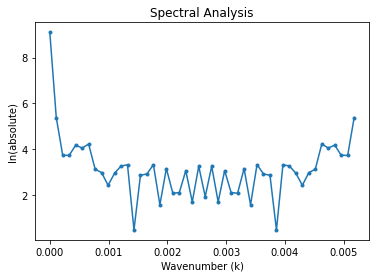

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

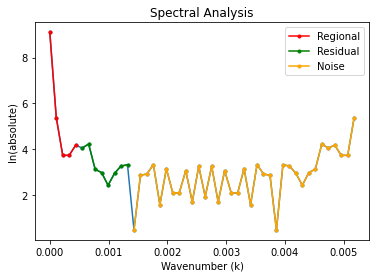

In [ ]:
# guess the cutoff !!!
reg_cut = 5
res_cut = 13

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Determine window for Moving Average

#### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

#### Regression, calculate Cutt-off Frequency, calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  15.355375527446293 

Intercept for Regional Zone:  7.527979325099439
Gradient for Regional Zone:  -10465.703027610054
Intercept for Residual Zone:  4.400934864109847
Gradient for Residual Zone:  -1191.588281479047
Cut-off frequency:  0.00033717983296401835


#### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 15.0


#### Plot regression of spectrum

Text(0, 0.5, 'ln(absolute)')

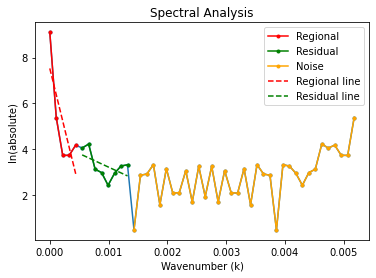

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

### Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

### Print dataframe

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

UTM_X         UTM_Y      Interval         CBA    Regional  Residual
0   302531.741108  4.232580e+06      0.000000 -205.232592         NaN       NaN
1   302531.741108  4.233793e+06   1213.550449 -204.659708         NaN       NaN
2   302531.741108  4.235007e+06   2427.100898 -204.668045         NaN       NaN
3   302531.741108  4.236220e+06   3640.651347 -201.718622         NaN       NaN
4   302531.741108  4.237434e+06   4854.201796 -200.246995         NaN       NaN
5   302531.741108  4.238648e+06   6067.752245 -196.424674         NaN       NaN
6   302531.741108  4.239861e+06   7281.302694 -191.891713         NaN       NaN
7   302531.741108  4.241075e+06   8494.853143 -190.022098         NaN       NaN
8   302531.741108  4.242288e+06   9708.403592 -191.161895         NaN       NaN
9   302531.741108  4.243502e+06  10921.954041 -193.808854         NaN       NaN
10  302531.741108  4.244715e+06  12135.504490 -195.014443         NaN       NaN
11  302531.741108  4.245929e+06  13349.054939 -196.066208         NaN       NaN
12  302531.741108  4.247142e+06  14562.605388 -195.397443         NaN       NaN
13  302531.741108  4.248356e+06  15776.155837 -196.212386         NaN       NaN
14  302531.741108  4.249570e+06  16989.706286 -196.159372 -197.245670  1.086298
15  302531.741108  4.250783e+06  18203.256735 -194.684623 -196.542472  1.857849
16  302531.741108  4.251997e+06  19416.807184 -195.230358 -195.913849  0.683491
17  302531.741108  4.253210e+06  20630.357633 -194.238776 -195.218564  0.979788
18  302531.741108  4.254424e+06  21843.908082 -190.281160 -194.456067  4.174906
19  302531.741108  4.255637e+06  23057.458531 -186.296518 -193.526035  7.229516

### Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

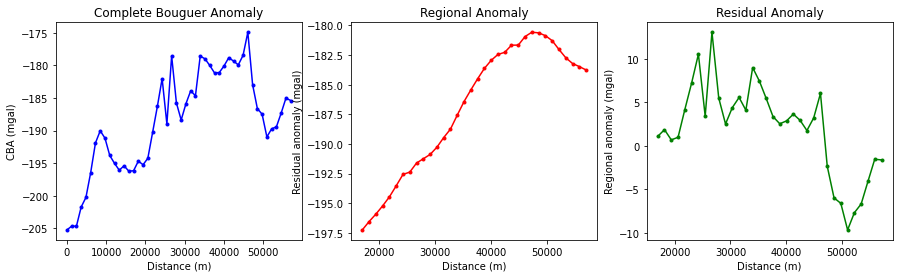

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

### Save data into CSV

In [ ]:
mva.to_csv('/content/fft_N-S_1.csv') 

## North-South Slice 2

In [ ]:
# N-S slice

loc = 25

x_slice = []
for k in range(len(xi)):
  xslice = xi[k][loc]
  x_slice.append(float(xslice))
x_slice = np.array(x_slice)
print('Coordinate slice in X direction:', x_slice, '\n')

y_slice = []
for k in range(len(xi)):
  yslice = yi[k][k]
  y_slice.append(float(yslice))
y_slice = np.array(y_slice)
print('Coordinate slice in Y direction:', y_slice, '\n')

g_slice = []
for k in range(len(xi)):
  gslice = zi[k][loc]
  g_slice.append(float(gslice))
g_slice = np.array(g_slice)
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [325143.57572041 325143.57572041 325143.57572041 325143.57572041
 325143.57572041 325143.57572041 325143.57572041 325143.57572041
 325143.57572041 325143.57572041 325143.57572041 325143.57572041
 325143.57572041 325143.57572041 325143.57572041 325143.57572041
 325143.57572041 325143.57572041 325143.57572041 325143.57572041
 325143.57572041 325143.57572041 325143.57572041 325143.57572041
 325143.57572041 325143.57572041 325143.57572041 325143.57572041
 325143.57572041 325143.57572041 325143.57572041 325143.57572041
 325143.57572041 325143.57572041 325143.57572041 325143.57572041
 325143.57572041 325143.57572041 325143.57572041 325143.57572041
 325143.57572041 325143.57572041 325143.57572041 325143.57572041
 325143.57572041 325143.57572041 325143.57572041 325143.57572041
 325143.57572041 325143.57572041] 

Coordinate slice in Y direction: [4231366.251      4232579.80144898 4233793.35189796 4235006.90234694
 4236220.45279592 4237434.0032449  4238647.553693

Visualize the slice

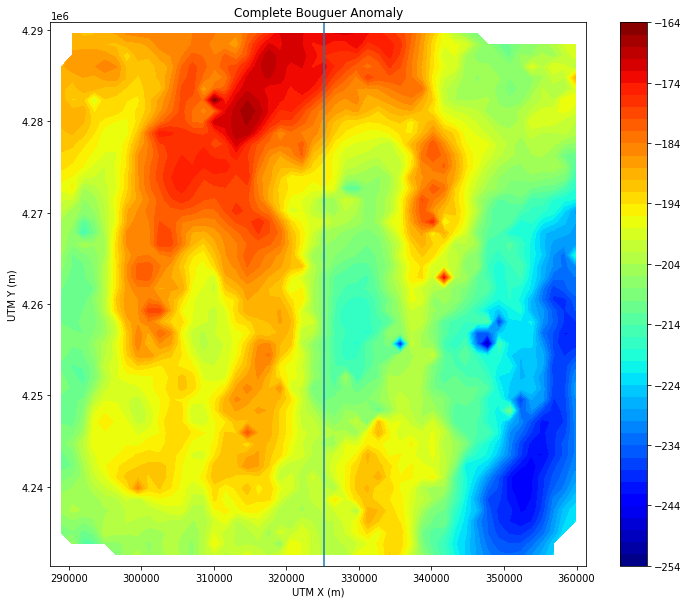

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

### Data preparation for FFT

Create dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

UTM_X         UTM_Y         CBA
0  325143.57572  4.231366e+06         NaN
1  325143.57572  4.232580e+06 -202.816232
2  325143.57572  4.233793e+06 -202.917491
3  325143.57572  4.235007e+06 -203.485528
4  325143.57572  4.236220e+06 -202.037261
5  325143.57572  4.237434e+06 -201.751903
6  325143.57572  4.238648e+06 -200.612191
7  325143.57572  4.239861e+06 -201.585213
8  325143.57572  4.241075e+06 -204.161423
9  325143.57572  4.242288e+06 -202.079353

Remove NaN from dataframe

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      2
dtype: int64
NaN has successfully been deleted


UTM_X         UTM_Y         CBA
0  325143.57572  4.232580e+06 -202.816232
1  325143.57572  4.233793e+06 -202.917491
2  325143.57572  4.235007e+06 -203.485528
3  325143.57572  4.236220e+06 -202.037261
4  325143.57572  4.237434e+06 -201.751903
5  325143.57572  4.238648e+06 -200.612191
6  325143.57572  4.239861e+06 -201.585213
7  325143.57572  4.241075e+06 -204.161423
8  325143.57572  4.242288e+06 -202.079353
9  325143.57572  4.243502e+06 -202.242798

Calculate interval on slice

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

Put interval into dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

UTM_X         UTM_Y         CBA      Interval
0  325143.57572  4.232580e+06 -202.816232      0.000000
1  325143.57572  4.233793e+06 -202.917491   1213.550449
2  325143.57572  4.235007e+06 -203.485528   2427.100898
3  325143.57572  4.236220e+06 -202.037261   3640.651347
4  325143.57572  4.237434e+06 -201.751903   4854.201796
5  325143.57572  4.238648e+06 -200.612191   6067.752245
6  325143.57572  4.239861e+06 -201.585213   7281.302694
7  325143.57572  4.241075e+06 -204.161423   8494.853143
8  325143.57572  4.242288e+06 -202.079353   9708.403592
9  325143.57572  4.243502e+06 -202.242798  10921.954041

### Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

48


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...   Imaginary     Absolute  LnAbsolute
0  325143.57572  4.232580e+06 -202.816232  ...    0.000000  9542.888373    9.163551
1  325143.57572  4.233793e+06 -202.917491  ...  216.719734   324.979911    5.783763
2  325143.57572  4.235007e+06 -203.485528  ...  123.342768   123.516858    4.816378
3  325143.57572  4.236220e+06 -202.037261  ...   83.970205    90.423837    4.504508
4  325143.57572  4.237434e+06 -201.751903  ...   74.175208    75.860964    4.328902
5  325143.57572  4.238648e+06 -200.612191  ...   45.043955    48.222386    3.875823
6  325143.57572  4.239861e+06 -201.585213  ...   31.074521    44.318870    3.791411
7  325143.57572  4.241075e+06 -204.161423  ...   24.968775    29.957822    3.399790
8  325143.57572  4.242288e+06 -202.079353  ...   34.635486    35.688567    3.574830
9  325143.57572  4.243502e+06 -202.242798  ...   16.949319    19.094781    2.949415

[10 rows x 9 columns]

Compute sampling frequency

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...     Absolute  LnAbsolute  FreqSample
0  325143.57572  4.232580e+06 -202.816232  ...  9542.888373    9.163551    0.000000
1  325143.57572  4.233793e+06 -202.917491  ...   324.979911    5.783763    0.000018
2  325143.57572  4.235007e+06 -203.485528  ...   123.516858    4.816378    0.000035
3  325143.57572  4.236220e+06 -202.037261  ...    90.423837    4.504508    0.000053
4  325143.57572  4.237434e+06 -201.751903  ...    75.860964    4.328902    0.000070
5  325143.57572  4.238648e+06 -200.612191  ...    48.222386    3.875823    0.000088
6  325143.57572  4.239861e+06 -201.585213  ...    44.318870    3.791411    0.000105
7  325143.57572  4.241075e+06 -204.161423  ...    29.957822    3.399790    0.000123
8  325143.57572  4.242288e+06 -202.079353  ...    35.688567    3.574830    0.000140
9  325143.57572  4.243502e+06 -202.242798  ...    19.094781    2.949415    0.000158

[10 rows x 10 columns]

Wavenumber

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...  LnAbsolute  FreqSample  Wavenumber
0  325143.57572  4.232580e+06 -202.816232  ...    9.163551    0.000000    0.000000
1  325143.57572  4.233793e+06 -202.917491  ...    5.783763    0.000018    0.000110
2  325143.57572  4.235007e+06 -203.485528  ...    4.816378    0.000035    0.000220
3  325143.57572  4.236220e+06 -202.037261  ...    4.504508    0.000053    0.000330
4  325143.57572  4.237434e+06 -201.751903  ...    4.328902    0.000070    0.000441
5  325143.57572  4.238648e+06 -200.612191  ...    3.875823    0.000088    0.000551
6  325143.57572  4.239861e+06 -201.585213  ...    3.791411    0.000105    0.000661
7  325143.57572  4.241075e+06 -204.161423  ...    3.399790    0.000123    0.000771
8  325143.57572  4.242288e+06 -202.079353  ...    3.574830    0.000140    0.000881
9  325143.57572  4.243502e+06 -202.242798  ...    2.949415    0.000158    0.000991

[10 rows x 11 columns]

Plot Spectrum

Text(0, 0.5, 'ln(absolute)')

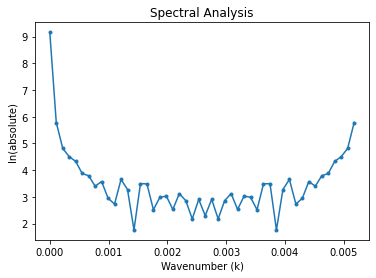

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

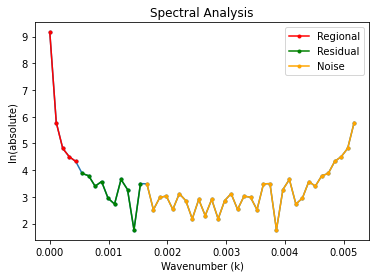

In [ ]:
# guess the cutoff !!!
reg_cut = 5
res_cut = 15

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Determine window for Moving Average

#### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

#### Regression, calculate Cutt-off Frequency, calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  12.819221210367187 

Intercept for Regional Zone:  7.909131316526267
Gradient for Regional Zone:  -9938.768758517805
Intercept for Residual Zone:  4.299636130961419
Gradient for Residual Zone:  -1001.8856892003197
Cut-off frequency:  0.00040388748040769736


#### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 13.0


#### Plot regression of spectrum

Text(0, 0.5, 'ln(absolute)')

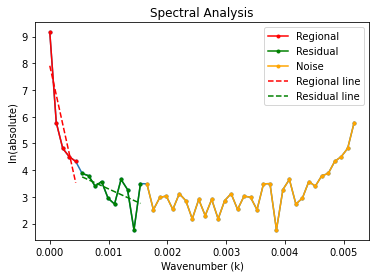

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

### Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

### Print dataframe

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

UTM_X         UTM_Y      Interval         CBA    Regional  Residual
0   325143.57572  4.232580e+06      0.000000 -202.816232         NaN       NaN
1   325143.57572  4.233793e+06   1213.550449 -202.917491         NaN       NaN
2   325143.57572  4.235007e+06   2427.100898 -203.485528         NaN       NaN
3   325143.57572  4.236220e+06   3640.651347 -202.037261         NaN       NaN
4   325143.57572  4.237434e+06   4854.201796 -201.751903         NaN       NaN
5   325143.57572  4.238648e+06   6067.752245 -200.612191         NaN       NaN
6   325143.57572  4.239861e+06   7281.302694 -201.585213         NaN       NaN
7   325143.57572  4.241075e+06   8494.853143 -204.161423         NaN       NaN
8   325143.57572  4.242288e+06   9708.403592 -202.079353         NaN       NaN
9   325143.57572  4.243502e+06  10921.954041 -202.242798         NaN       NaN
10  325143.57572  4.244715e+06  12135.504490 -205.145833         NaN       NaN
11  325143.57572  4.245929e+06  13349.054939 -202.769376         NaN       NaN
12  325143.57572  4.247142e+06  14562.605388 -204.566251 -202.782373 -1.783878
13  325143.57572  4.248356e+06  15776.155837 -207.696378 -203.157769 -4.538609
14  325143.57572  4.249570e+06  16989.706286 -210.330891 -203.728031 -6.602860
15  325143.57572  4.250783e+06  18203.256735 -209.763253 -204.210933 -5.552320
16  325143.57572  4.251997e+06  19416.807184 -209.337312 -204.772475 -4.564837
17  325143.57572  4.253210e+06  20630.357633 -209.905475 -205.399673 -4.505802
18  325143.57572  4.254424e+06  21843.908082 -209.541565 -206.086548 -3.455017
19  325143.57572  4.255637e+06  23057.458531 -210.189534 -206.748419 -3.441115

### Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

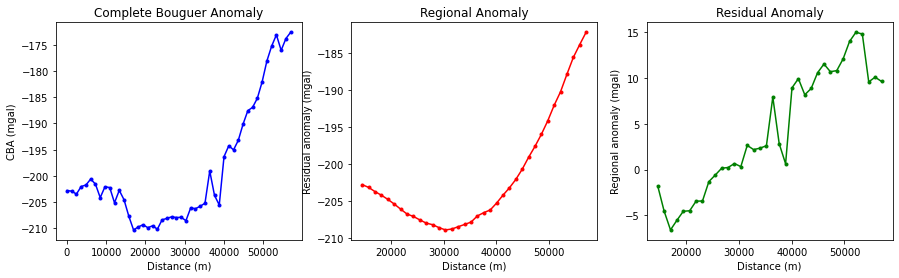

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

### Save data into CSV

In [ ]:
mva.to_csv('/content/fft_N-S_2.csv') 

## North-South Slice 3

In [ ]:
# N-S slice

loc = 40

x_slice = []
for k in range(len(xi)):
  xslice = xi[k][loc]
  x_slice.append(float(xslice))
x_slice = np.array(x_slice)
print('Coordinate slice in X direction:', x_slice, '\n')

y_slice = []
for k in range(len(xi)):
  yslice = yi[k][k]
  y_slice.append(float(yslice))
y_slice = np.array(y_slice)
print('Coordinate slice in Y direction:', y_slice, '\n')

g_slice = []
for k in range(len(xi)):
  gslice = zi[k][loc]
  g_slice.append(float(gslice))
g_slice = np.array(g_slice)
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [347755.41033265 347755.41033265 347755.41033265 347755.41033265
 347755.41033265 347755.41033265 347755.41033265 347755.41033265
 347755.41033265 347755.41033265 347755.41033265 347755.41033265
 347755.41033265 347755.41033265 347755.41033265 347755.41033265
 347755.41033265 347755.41033265 347755.41033265 347755.41033265
 347755.41033265 347755.41033265 347755.41033265 347755.41033265
 347755.41033265 347755.41033265 347755.41033265 347755.41033265
 347755.41033265 347755.41033265 347755.41033265 347755.41033265
 347755.41033265 347755.41033265 347755.41033265 347755.41033265
 347755.41033265 347755.41033265 347755.41033265 347755.41033265
 347755.41033265 347755.41033265 347755.41033265 347755.41033265
 347755.41033265 347755.41033265 347755.41033265 347755.41033265
 347755.41033265 347755.41033265] 

Coordinate slice in Y direction: [4231366.251      4232579.80144898 4233793.35189796 4235006.90234694
 4236220.45279592 4237434.0032449  4238647.553693

Visualize the slice

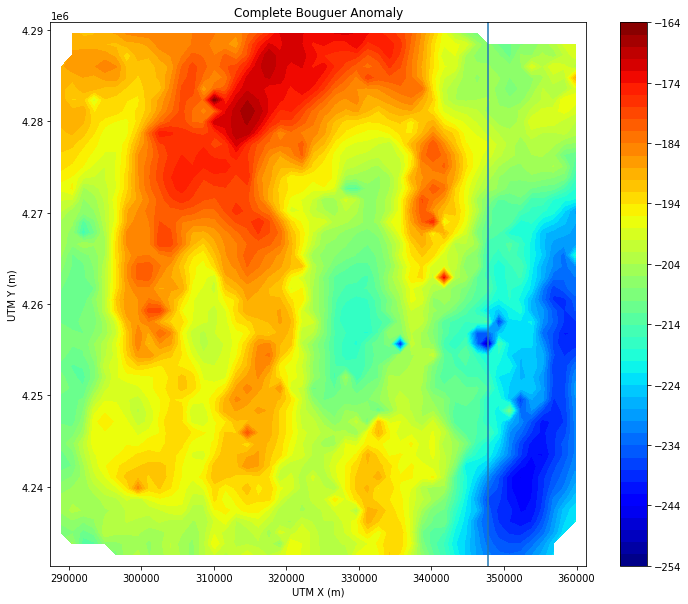

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

### Data preparation for FFT

Create dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

UTM_X         UTM_Y         CBA
0  347755.410333  4.231366e+06         NaN
1  347755.410333  4.232580e+06 -231.412498
2  347755.410333  4.233793e+06 -232.927192
3  347755.410333  4.235007e+06 -234.186048
4  347755.410333  4.236220e+06 -234.247820
5  347755.410333  4.237434e+06 -235.091839
6  347755.410333  4.238648e+06 -236.201490
7  347755.410333  4.239861e+06 -233.487265
8  347755.410333  4.241075e+06 -230.214516
9  347755.410333  4.242288e+06 -224.499779

Remove NaN from dataframe

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      3
dtype: int64
NaN has successfully been deleted


UTM_X         UTM_Y         CBA
0  347755.410333  4.232580e+06 -231.412498
1  347755.410333  4.233793e+06 -232.927192
2  347755.410333  4.235007e+06 -234.186048
3  347755.410333  4.236220e+06 -234.247820
4  347755.410333  4.237434e+06 -235.091839
5  347755.410333  4.238648e+06 -236.201490
6  347755.410333  4.239861e+06 -233.487265
7  347755.410333  4.241075e+06 -230.214516
8  347755.410333  4.242288e+06 -224.499779
9  347755.410333  4.243502e+06 -220.371855

Calculate interval on slice

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

Put interval into dataframe

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

UTM_X         UTM_Y         CBA      Interval
0  347755.410333  4.232580e+06 -231.412498      0.000000
1  347755.410333  4.233793e+06 -232.927192   1213.550449
2  347755.410333  4.235007e+06 -234.186048   2427.100898
3  347755.410333  4.236220e+06 -234.247820   3640.651347
4  347755.410333  4.237434e+06 -235.091839   4854.201796
5  347755.410333  4.238648e+06 -236.201490   6067.752245
6  347755.410333  4.239861e+06 -233.487265   7281.302694
7  347755.410333  4.241075e+06 -230.214516   8494.853143
8  347755.410333  4.242288e+06 -224.499779   9708.403592
9  347755.410333  4.243502e+06 -220.371855  10921.954041

### Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

47


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

UTM_X         UTM_Y  ...      Absolute  LnAbsolute
0  347755.410333  4.232580e+06  ...  10176.726986    9.227859
1  347755.410333  4.233793e+06  ...    268.655167    5.593429
2  347755.410333  4.235007e+06  ...    181.014588    5.198578
3  347755.410333  4.236220e+06  ...    132.977910    4.890183
4  347755.410333  4.237434e+06  ...     67.022308    4.205026
5  347755.410333  4.238648e+06  ...     70.732001    4.258898
6  347755.410333  4.239861e+06  ...     48.736909    3.886437
7  347755.410333  4.241075e+06  ...     61.970601    4.126660
8  347755.410333  4.242288e+06  ...     60.207487    4.097797
9  347755.410333  4.243502e+06  ...     17.195324    2.844637

[10 rows x 9 columns]

Compute sampling frequency

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

UTM_X         UTM_Y  ...  LnAbsolute  FreqSample
0  347755.410333  4.232580e+06  ...    9.227859    0.000000
1  347755.410333  4.233793e+06  ...    5.593429    0.000018
2  347755.410333  4.235007e+06  ...    5.198578    0.000036
3  347755.410333  4.236220e+06  ...    4.890183    0.000054
4  347755.410333  4.237434e+06  ...    4.205026    0.000072
5  347755.410333  4.238648e+06  ...    4.258898    0.000090
6  347755.410333  4.239861e+06  ...    3.886437    0.000107
7  347755.410333  4.241075e+06  ...    4.126660    0.000125
8  347755.410333  4.242288e+06  ...    4.097797    0.000143
9  347755.410333  4.243502e+06  ...    2.844637    0.000161

[10 rows x 10 columns]

Wavenumber

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

UTM_X         UTM_Y         CBA  ...  LnAbsolute  FreqSample  Wavenumber
0  347755.410333  4.232580e+06 -231.412498  ...    9.227859    0.000000    0.000000
1  347755.410333  4.233793e+06 -232.927192  ...    5.593429    0.000018    0.000113
2  347755.410333  4.235007e+06 -234.186048  ...    5.198578    0.000036    0.000225
3  347755.410333  4.236220e+06 -234.247820  ...    4.890183    0.000054    0.000338
4  347755.410333  4.237434e+06 -235.091839  ...    4.205026    0.000072    0.000450
5  347755.410333  4.238648e+06 -236.201490  ...    4.258898    0.000090    0.000563
6  347755.410333  4.239861e+06 -233.487265  ...    3.886437    0.000107    0.000675
7  347755.410333  4.241075e+06 -230.214516  ...    4.126660    0.000125    0.000788
8  347755.410333  4.242288e+06 -224.499779  ...    4.097797    0.000143    0.000900
9  347755.410333  4.243502e+06 -220.371855  ...    2.844637    0.000161    0.001013

[10 rows x 11 columns]

Plot Spectrum

Text(0, 0.5, 'ln(absolute)')

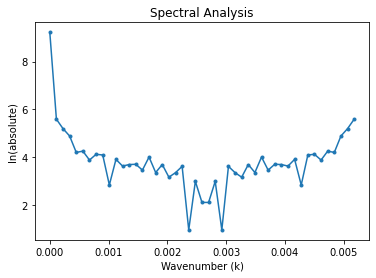

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

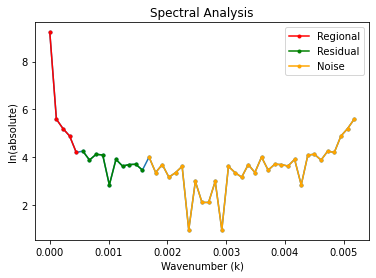

In [ ]:
# guess the cutoff !!!
reg_cut = 5
res_cut = 15

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Determine window for Moving Average

#### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

#### Regression, calculate Cutt-off Frequency, calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  12.94851111889444 

Intercept for Regional Zone:  7.972797114749337
Gradient for Regional Zone:  -9549.93261459015
Intercept for Residual Zone:  4.387417711252034
Gradient for Residual Zone:  -583.2268228129923
Cut-off frequency:  0.00039985469432768107


#### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 13.0


#### Plot regression of spectrum

Text(0, 0.5, 'ln(absolute)')

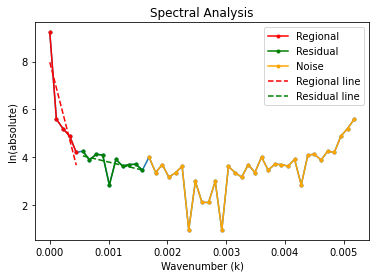

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

### Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

### Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

### Print dataframe

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

UTM_X         UTM_Y  ...    Regional   Residual
0   347755.410333  4.232580e+06  ...         NaN        NaN
1   347755.410333  4.233793e+06  ...         NaN        NaN
2   347755.410333  4.235007e+06  ...         NaN        NaN
3   347755.410333  4.236220e+06  ...         NaN        NaN
4   347755.410333  4.237434e+06  ...         NaN        NaN
5   347755.410333  4.238648e+06  ...         NaN        NaN
6   347755.410333  4.239861e+06  ...         NaN        NaN
7   347755.410333  4.241075e+06  ...         NaN        NaN
8   347755.410333  4.242288e+06  ...         NaN        NaN
9   347755.410333  4.243502e+06  ...         NaN        NaN
10  347755.410333  4.244715e+06  ...         NaN        NaN
11  347755.410333  4.245929e+06  ...         NaN        NaN
12  347755.410333  4.247142e+06  ... -228.108490   9.889960
13  347755.410333  4.248356e+06  ... -227.062076   9.252962
14  347755.410333  4.249570e+06  ... -225.942919   7.564766
15  347755.410333  4.250783e+06  ... -224.392266  10.364707
16  347755.410333  4.251997e+06  ... -223.001433   6.834444
17  347755.410333  4.253210e+06  ... -221.706735   3.445967
18  347755.410333  4.254424e+06  ... -220.490293   0.102559
19  347755.410333  4.255637e+06  ... -221.967275 -30.720761

[20 rows x 6 columns]

### Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

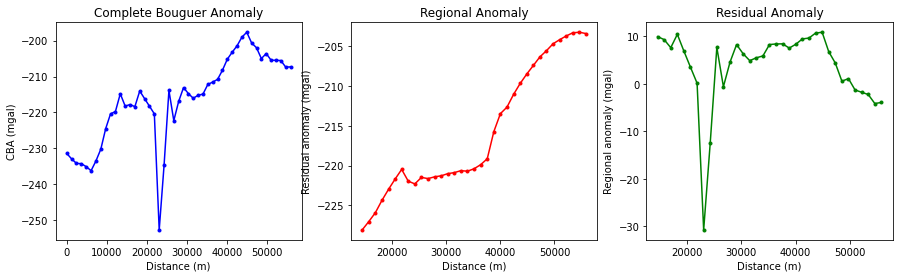

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

### Save data into CSV

In [ ]:
mva.to_csv('/content/fft_N-S_3.csv') 

## Create 2D Map of Resulted Slices Anomalies

Load slices anomaly results in CSV format

In [ ]:
swne = pd.read_csv('/content/computational-geophysics/gravity/results/fft_SW-NE.csv')
senw = pd.read_csv('/content/computational-geophysics/gravity/results/fft_SE-NW.csv')
ew1 = pd.read_csv('/content/computational-geophysics/gravity/results/fft_E-W_1.csv')
ew2 = pd.read_csv('/content/computational-geophysics/gravity/results/fft_E-W_2.csv')
ew3 = pd.read_csv('/content/computational-geophysics/gravity/results/fft_E-W_3.csv')
ns1 = pd.read_csv('/content/computational-geophysics/gravity/results/fft_N-S_1.csv')
ns2 = pd.read_csv('/content/computational-geophysics/gravity/results/fft_N-S_2.csv')
ns3 = pd.read_csv('/content/computational-geophysics/gravity/results/fft_N-S_3.csv')

Append (concatenate) all data

In [ ]:
utm_x_mva = np.concatenate((swne.UTM_X, ew1.UTM_X, ew2.UTM_X, ew3.UTM_X, ns1.UTM_X, ns2.UTM_X, ns3.UTM_X), axis=0)
utm_y_mva = np.concatenate((swne.UTM_Y, ew1.UTM_Y, ew2.UTM_Y, ew3.UTM_Y, ns1.UTM_Y, ns2.UTM_Y, ns3.UTM_Y), axis=0)
CBA_mva = np.concatenate((swne.CBA, ew1.CBA, ew2.CBA, ew3.CBA, ns1.CBA, ns2.CBA, ns3.CBA), axis=0)
regional_mva = np.concatenate((swne.Regional, ew1.Regional, ew2.Regional, ew3.Regional, ns1.Regional, ns2.Regional, ns3.Regional), axis=0)
residual_mva = np.concatenate((swne.Residual, ew1.Residual, ew2.Residual, ew3.Residual, ns1.Residual, ns2.Residual, ns3.Residual), axis=0)

In [ ]:
len(CBA_mva)

253

Gridding and interpolating results

In [ ]:
import scipy
from scipy.interpolate import griddata

# Gridding
xi_mva = np.linspace(min(utm_x_mva), max(utm_x_mva), 50)
yi_mva = np.linspace(min(utm_y_mva), max(utm_y_mva), 50)
xi_mva, yi_mva = np.meshgrid(xi_mva, yi_mva)

# Interpolation
zi_cba_mva = griddata((utm_x_mva,utm_y_mva),CBA_mva,(xi_mva,yi_mva),method='cubic')
zi_reg_mva = griddata((utm_x_mva,utm_y_mva),regional_mva,(xi_mva,yi_mva),method='cubic')
zi_res_mva = griddata((utm_x_mva,utm_y_mva),residual_mva,(xi_mva,yi_mva),method='cubic')

Plot results (using original data coordinates `utm_x` and `utm_y`)

In [ ]:
min_x = min(utm_x)
max_x = max(utm_x)
min_y = min(utm_y)
max_y = max(utm_y)

Complete Bouguer Anomaly

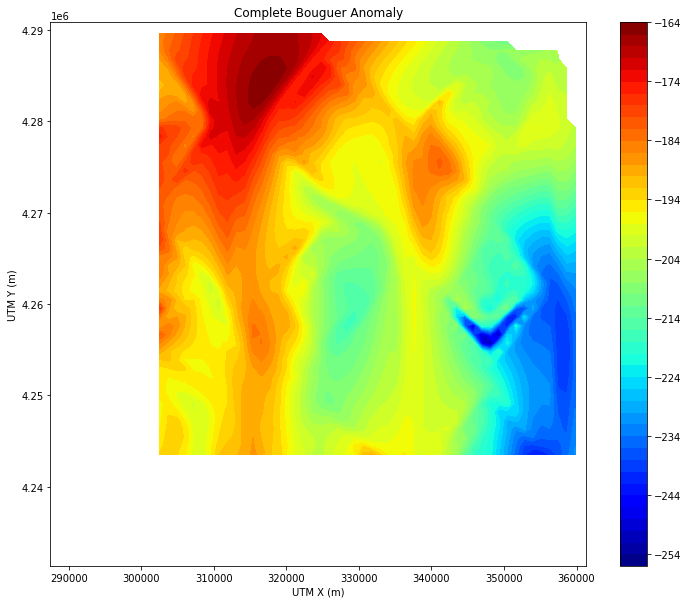

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

# plot CBA contours
im = ax.contourf(xi_mva,yi_mva,zi_cba_mva,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
plt.colorbar(im)

Regional Anomaly

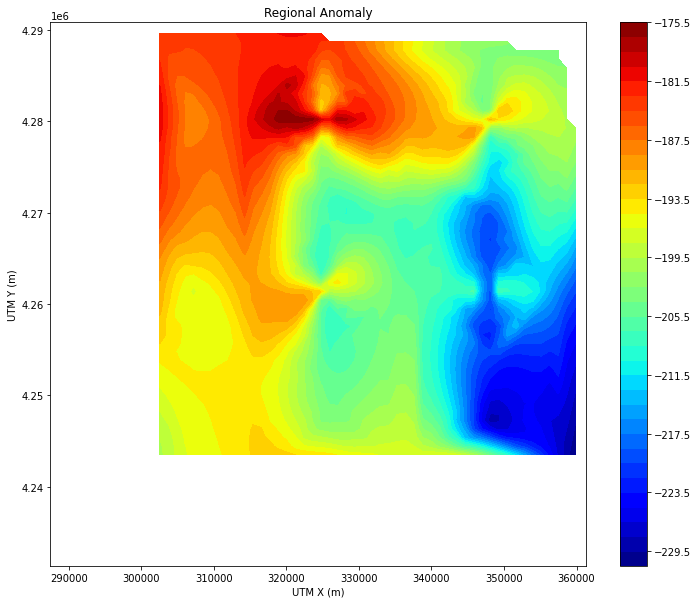

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

# plot regional contours
im = ax.contourf(xi_mva,yi_mva,zi_reg_mva,levels=50, cmap="jet")
ax.set_title('Regional Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
plt.colorbar(im)

Residual Anomaly

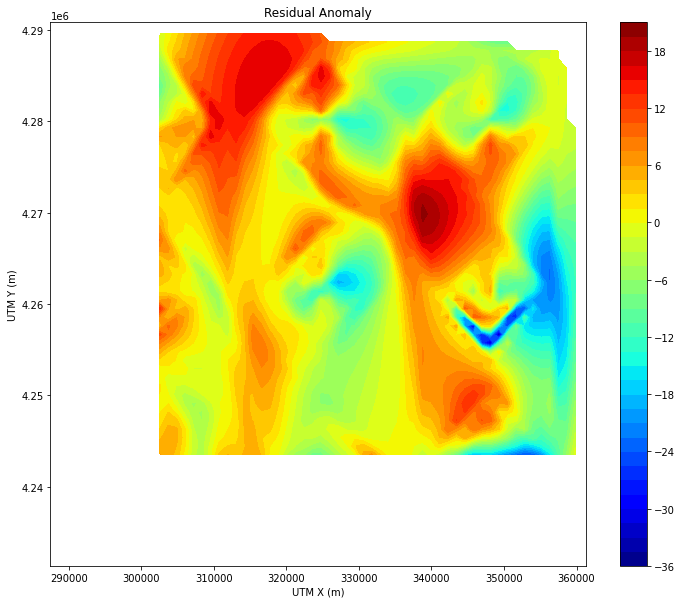

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

# plot residual contours
im = ax.contourf(xi_mva,yi_mva,zi_res_mva,levels=50, cmap="jet")
ax.set_title('Residual Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
plt.colorbar(im)

## All Anomalies

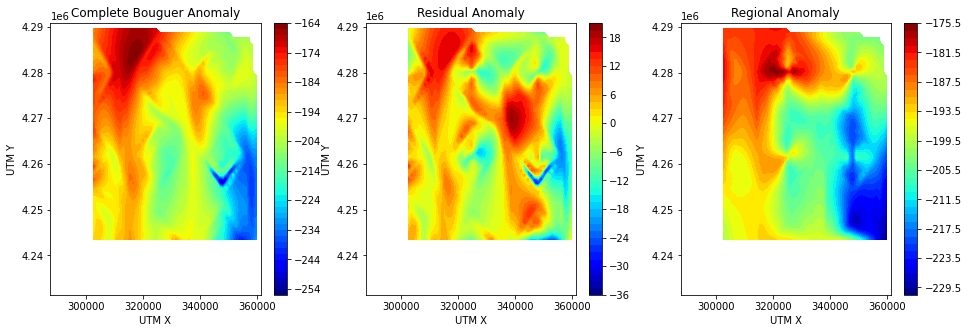

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
axs = axs.flatten()

im = axs[0].contourf(xi_mva,yi_mva,zi_cba_mva,levels=50, cmap="jet")
axs[0].set_title('Complete Bouguer Anomaly')
axs[0].set_xlabel('UTM X'); axs[0].set_ylabel('UTM Y')
axs[0].set_xlim(min_x, max_x)
axs[0].set_ylim(min_y, max_y)
fig.colorbar(im, ax=axs[0])

im = axs[1].contourf(xi_mva,yi_mva,zi_res_mva,levels=50, cmap="jet")
axs[1].set_title('Residual Anomaly')
axs[1].set_xlabel('UTM X'); axs[1].set_ylabel('UTM Y')
axs[1].set_xlim(min_x, max_x)
axs[1].set_ylim(min_y, max_y)
fig.colorbar(im, ax=axs[1])

im = axs[2].contourf(xi_mva,yi_mva,zi_reg_mva,levels=50, cmap="jet")
axs[2].set_title('Regional Anomaly')
axs[2].set_xlabel('UTM X'); axs[2].set_ylabel('UTM Y')
axs[2].set_xlim(min_x, max_x)
axs[2].set_ylim(min_y, max_y)
fig.colorbar(im, ax=axs[2])